CASO 2

Andres Useche - Rafael Torregroza

In [ ]:
# Instalar paquetes si no están instalados
if (!require("dplyr")) install.packages("dplyr")
if (!require("tidyr")) install.packages("tidyr")
if (!require("ggplot2")) install.packages("ggplot2")
if (!require("caret")) install.packages("caret")
if (!require("e1071")) install.packages("e1071")  # Requerido por caret
if (!require("randomForest")) install.packages("randomForest")
if (!require("rpart")) install.packages("rpart")
if (!require("ipred")) install.packages("ipred")

# Cargar paquetes
library(dplyr)
library(tidyr)
library(ggplot2)
library(caret)
library(e1071)
library(randomForest)
library(rpart)
library(ipred)


Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: tidyr

Loading required package: ggplot2

Loading required package: caret

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘caret’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘sparsevctrs’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: e1071

Loading required package: randomForest

Warning message in library(package, 

In [ ]:
install.packages("randomForest")
library(randomForest)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
if (!require("gbm")) install.packages("gbm")
library(gbm)

Loading required package: gbm

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘gbm’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loaded gbm 2.2.2

This version of gbm is no longer under development. Consider transitioning to gbm3, https://github.com/gbm-developers/gbm3



In [ ]:
if (!require("xgboost")) install.packages("xgboost")
library(xgboost)

Loading required package: xgboost

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘xgboost’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘xgboost’


The following object is masked from ‘package:dplyr’:

    slice




In [ ]:
install.packages("lightgbm")
library(lightgbm)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:

library(pROC)


Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var




Campos de la base de datos
id - id anónimo que identifica al cliente.

Fecha de nacimiento - Fecha de nacimiento del cliente, dd/mm/yyyy.

tipo cliente - Tipo de cliente: 1 - Hombre, 2 - Mujer, 3 - Cliente empresarial.

Factura online - Binario que indica si el cliente recibe únicamente su factura
online.
Antiguedad equipo - Meses de antigüedad del equipo.

Plan de datos - Binario. 1 = el cliente tiene plan premium de datos.

Facturación - Total facturación de los últimos seis meses (suma).

Mora - Días de mora acumulados.

Fecha inicio contrato - Fecha de inicio de su primer contrato de plan pospago en la compañía.

minutos - total minutos consumidos en los últimos seis meses.

resultado - 0 = No hubo deserción; 1 = Hubo deserción (churn)

In [ ]:
if (!require("readxl")) install.packages("readxl")
library(readxl)


df_train <- read_excel("/content/traintelco.xlsx")
df_test <- read_excel("/content/testelco.xlsx")

# PREPROCESAMIENTO DE DATOS

In [ ]:
head(df_train)

id,Fecha de nacimiento,tipo cliente,Factura online,Antigüedad Equipo,Plan de datos,facturación,mora,Fecha inicio contrato,minutos,resultado
<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<dbl>,<dbl>
5,1990-05-01 00:05:22,2,1,9,0,44588,34,2017-12-22 10:09:47,644,0
8,1980-06-30 19:08:57,2,0,41,1,341480,3,2017-07-28 02:54:52,663,0
9,1984-10-10 21:23:28,2,0,38,1,230662,20,2017-06-29 08:15:47,1039,1
11,1986-07-01 08:58:42,2,1,11,1,205336,9,2017-03-13 18:39:25,535,0
16,1986-01-23 00:26:52,1,1,6,0,429525,0,2015-08-02 21:50:40,1869,0
18,1981-11-30 06:11:31,2,1,21,1,327180,0,2016-08-03 23:33:54,2340,0


Convertir las variables categoricas a factor

In [ ]:
df_train <- df_train[,-1]
df_train$`tipo cliente` <- as.factor(df_train$`tipo cliente`)
df_train$`Factura online` <- as.factor(df_train$`Factura online`)
df_train$`Plan de datos` <- as.factor(df_train$`Plan de datos`)
df_train$resultado <- as.factor(df_train$resultado)

In [ ]:
head(df_train)

Fecha de nacimiento,tipo cliente,Factura online,Antigüedad Equipo,Plan de datos,facturación,mora,Fecha inicio contrato,minutos,resultado
<dttm>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dttm>,<dbl>,<fct>
1990-05-01 00:05:22,2,1,9,0,44588,34,2017-12-22 10:09:47,644,0
1980-06-30 19:08:57,2,0,41,1,341480,3,2017-07-28 02:54:52,663,0
1984-10-10 21:23:28,2,0,38,1,230662,20,2017-06-29 08:15:47,1039,1
1986-07-01 08:58:42,2,1,11,1,205336,9,2017-03-13 18:39:25,535,0
1986-01-23 00:26:52,1,1,6,0,429525,0,2015-08-02 21:50:40,1869,0
1981-11-30 06:11:31,2,1,21,1,327180,0,2016-08-03 23:33:54,2340,0


Convertir las fechas en numeros
La fecha de nacimineto se pasa a edad, el valor son los años de la persona
La fecha de la antiguedad del contrato, se pasa a meses de antiguedad del contrato

In [ ]:
# Calcular edad del cliente # el numero que de son años
df_train$edad <- as.numeric(difftime(Sys.Date(), as.Date(df_train$`Fecha de nacimiento`), units = "days")) %/% 365

# Antigüedad del contrato en meses # el numero que de esta en meses
df_train$antiguedad_contrato <- as.numeric(difftime(Sys.Date(), as.Date(df_train$`Fecha inicio contrato`), units = "days")) %/% 30


In [ ]:
head(df_train)

Fecha de nacimiento,tipo cliente,Factura online,Antigüedad Equipo,Plan de datos,facturación,mora,Fecha inicio contrato,minutos,resultado,edad,antiguedad_contrato
<dttm>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dttm>,<dbl>,<fct>,<dbl>,<dbl>
1990-05-01 00:05:22,2,1,9,0,44588,34,2017-12-22 10:09:47,644,0,35,90
1980-06-30 19:08:57,2,0,41,1,341480,3,2017-07-28 02:54:52,663,0,44,95
1984-10-10 21:23:28,2,0,38,1,230662,20,2017-06-29 08:15:47,1039,1,40,96
1986-07-01 08:58:42,2,1,11,1,205336,9,2017-03-13 18:39:25,535,0,38,100
1986-01-23 00:26:52,1,1,6,0,429525,0,2015-08-02 21:50:40,1869,0,39,119
1981-11-30 06:11:31,2,1,21,1,327180,0,2016-08-03 23:33:54,2340,0,43,107


In [ ]:
df_train <- df_train[,c(-1,-8)]

In [ ]:
head(df_train)

tipo cliente,Factura online,Antigüedad Equipo,Plan de datos,facturación,mora,minutos,resultado,edad,antiguedad_contrato
<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
2,1,9,0,44588,34,644,0,35,90
2,0,41,1,341480,3,663,0,44,95
2,0,38,1,230662,20,1039,1,40,96
2,1,11,1,205336,9,535,0,38,100
1,1,6,0,429525,0,1869,0,39,119
2,1,21,1,327180,0,2340,0,43,107


In [ ]:
summary(df_train)
df_train <- na.omit(df_train)

 tipo cliente Factura online Antigüedad Equipo Plan de datos  facturación     
 1:3740       0:4211         Min.   : 1.00     0:1310        Min.   :-112588  
 2:3605       1:4032         1st Qu.: 9.00     1:6933        1st Qu.: 203363  
 3: 898                      Median :24.00                   Median : 268063  
                             Mean   :24.27                   Mean   : 267766  
                             3rd Qu.:39.00                   3rd Qu.: 333272  
                             Max.   :48.00                   Max.   : 626111  
      mora           minutos      resultado      edad      antiguedad_contrato
 Min.   :  0.00   Min.   :  100   0:6882    Min.   :32.0   Min.   : 78        
 1st Qu.:  0.00   1st Qu.:  708   1:1361    1st Qu.:64.0   1st Qu.: 93        
 Median :  6.00   Median : 1103             Median :67.0   Median :100        
 Mean   : 18.13   Mean   : 1184             Mean   :66.7   Mean   :102        
 3rd Qu.: 35.00   3rd Qu.: 1498             3rd Qu.:

In [ ]:
sum(is.na(df_train))


[1] 0

,Antigüedad Equipo,facturación,mora,minutos,edad,antiguedad_contrato
Antigüedad Equipo,1.000000000,-0.007263941,-0.0048603732,-0.001841626,0.0064945674,0.0153992585
facturación,-0.007263941,1.000000000,0.0095571078,0.398121237,-0.0479307735,-0.0322432172
mora,-0.004860373,0.009557108,1.0000000000,0.005435449,-0.0006083457,-0.7113194232
minutos,-0.001841626,0.398121237,0.0054354494,1.000000000,-0.0179505641,-0.0173972354
edad,0.006494567,-0.047930773,-0.0006083457,-0.017950564,1.0000000000,0.0005584698
antiguedad_contrato,0.015399258,-0.032243217,-0.7113194232,-0.017397235,0.0005584698,1.0000000000


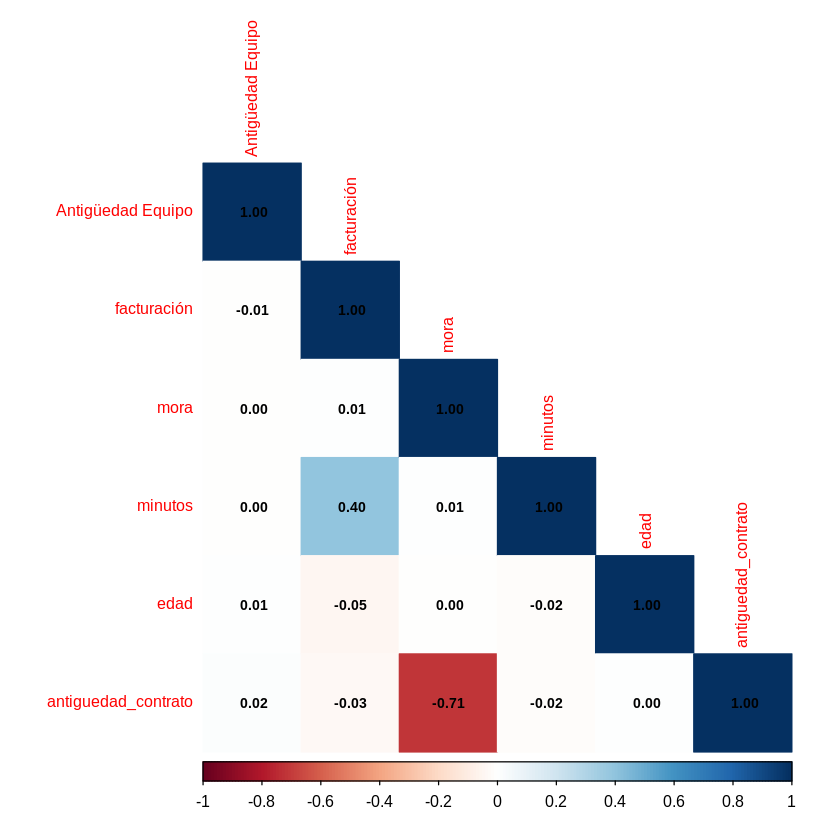

In [ ]:
if (!require("corrplot")) install.packages("corrplot")
library(corrplot)

numericas <- df_train %>% select(where(is.numeric))

cor_matrix <- cor(numericas, use = "complete.obs")
cor_matrix

corrplot(cor_matrix,method="color", type = "lower", tl.cex = 0.8, addCoef.col = "black", number.cex = 0.7)



Mas minutos usados mayor facturación

A mas antiguedad del contrato menos mora

In [ ]:


cat_cols <- df_train %>% select(where(~ is.character(.) || is.factor(.)))


for (col in names(cat_cols)) {
  cat("Conteo de", col, ":\n")
  print(table(cat_cols[[col]], useNA = "ifany"))
  cat(strrep("-", 40), "\n")
}


Conteo de tipo cliente :

   1    2    3 
3740 3605  898 
---------------------------------------- 
Conteo de Factura online :

   0    1 
4211 4032 
---------------------------------------- 
Conteo de Plan de datos :

   0    1 
1310 6933 
---------------------------------------- 
Conteo de resultado :

   0    1 
6882 1361 
---------------------------------------- 


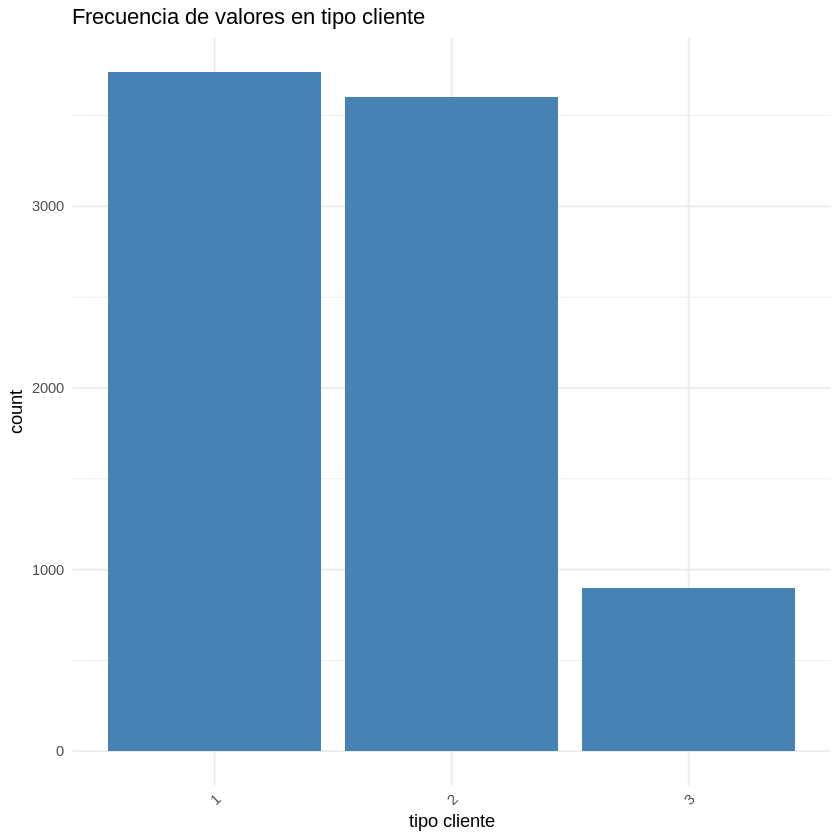

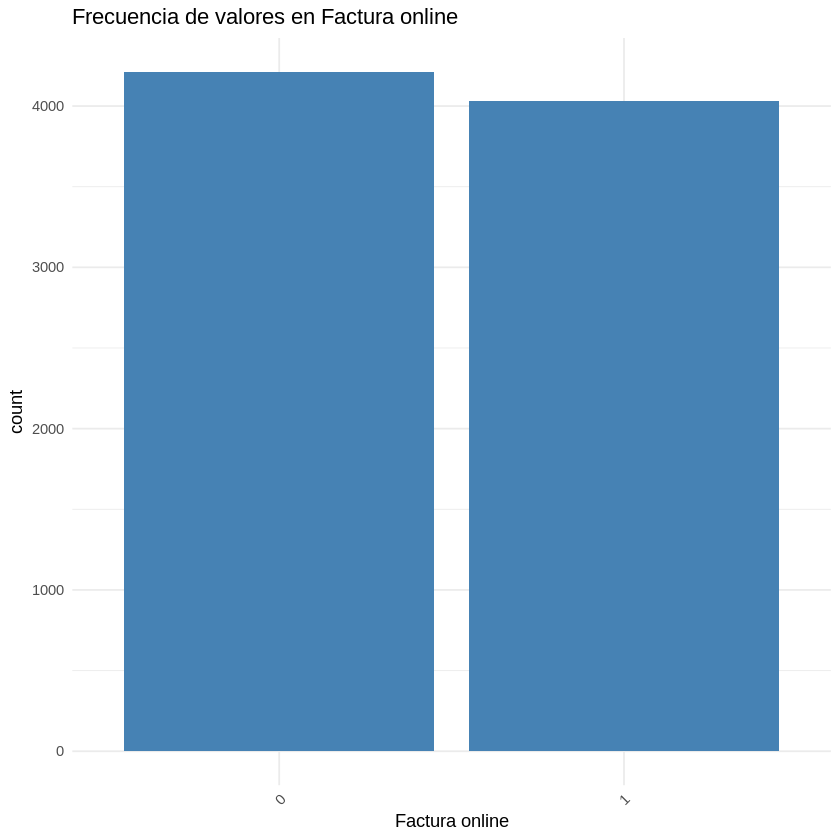

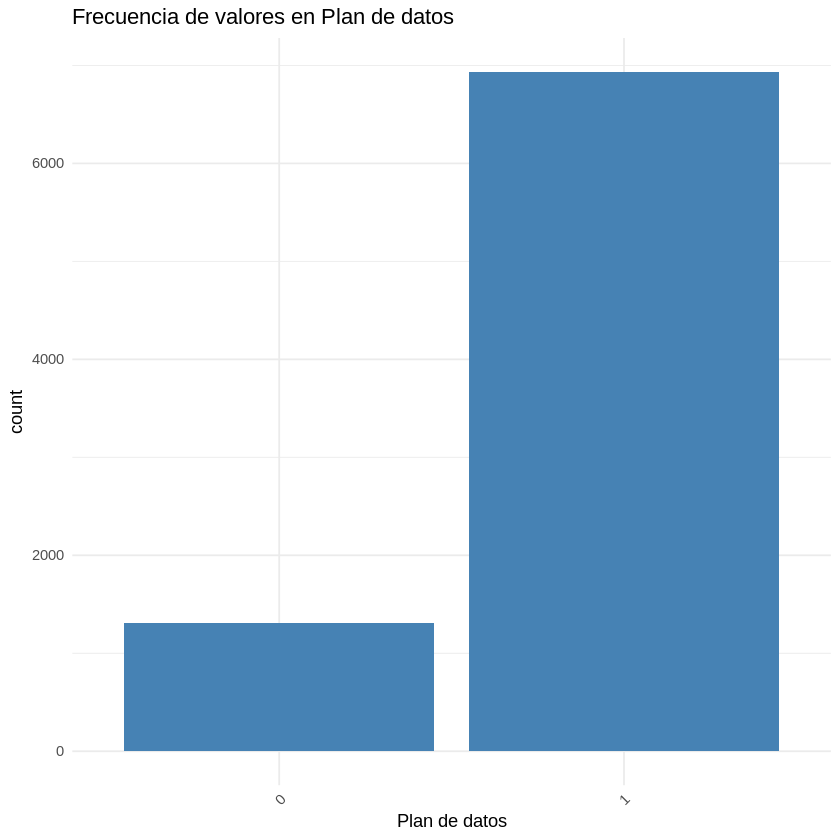

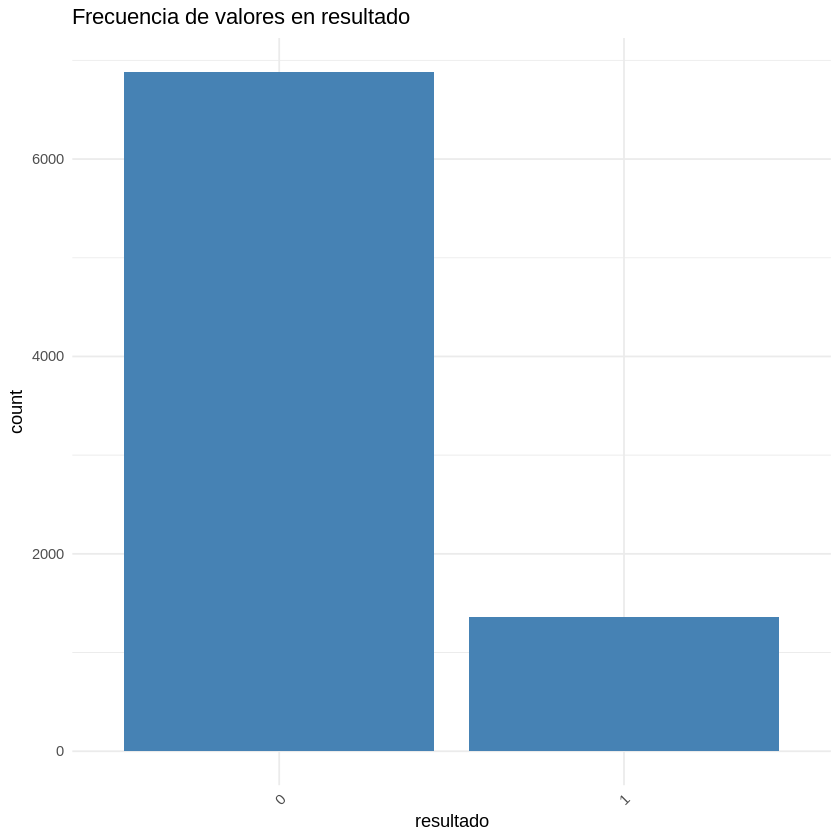

In [ ]:

for (col in names(cat_cols)) {

  p <- ggplot(cat_cols, aes(x = .data[[col]])) +
    geom_bar(fill = "steelblue") +
    ggtitle(paste("Frecuencia de valores en", col)) +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

  print(p)
}

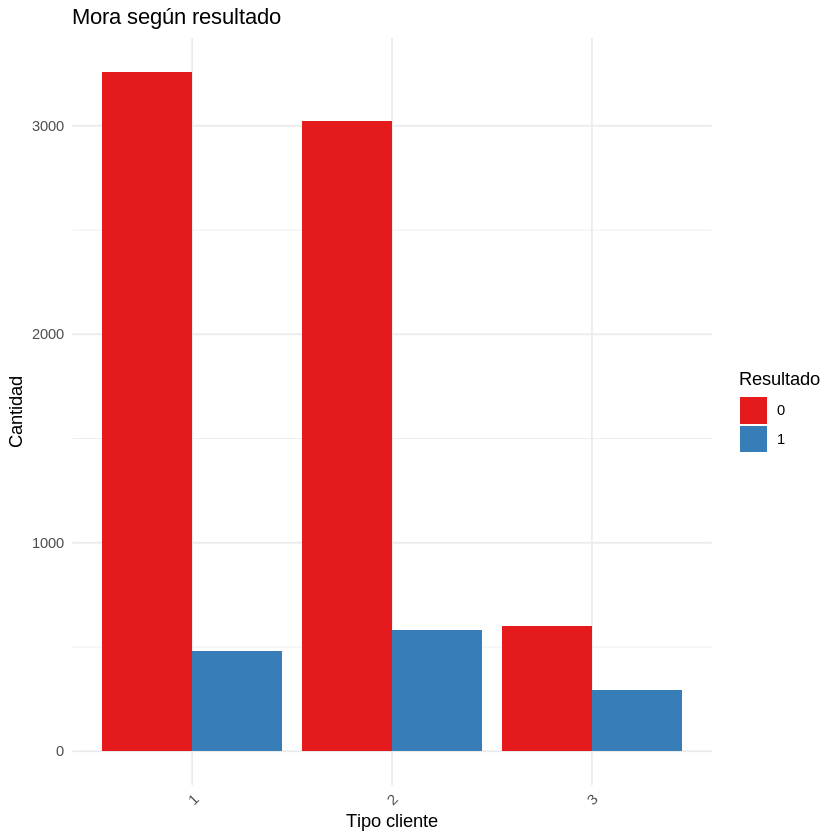

In [ ]:


ggplot(df_train, aes(x = `tipo cliente`, fill = resultado)) +
  geom_bar(position = "dodge") +
  scale_fill_brewer(palette = "Set1", name = "Resultado") +
  labs(
    title = "Mora según resultado",
    x = "Tipo cliente",
    y = "Cantidad"
  ) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


In [ ]:

df_train %>%
  group_by(`tipo cliente`, resultado) %>%
  summarise(conteo = n(), .groups = "drop") %>%
  group_by(`tipo cliente`) %>%
  mutate(
    proporcion = conteo / sum(conteo),
    porcentaje = round(proporcion * 100, 2)
  )


tipo cliente,resultado,conteo,proporcion,porcentaje
<fct>,<fct>,<int>,<dbl>,<dbl>
1,0,3258,0.8711230,87.11
1,1,482,0.1288770,12.89
2,0,3022,0.8382802,83.83
2,1,583,0.1617198,16.17
3,0,602,0.6703786,67.04
3,1,296,0.3296214,32.96


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message:
“The dot-dot notation (`..count..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(count)` instead.”


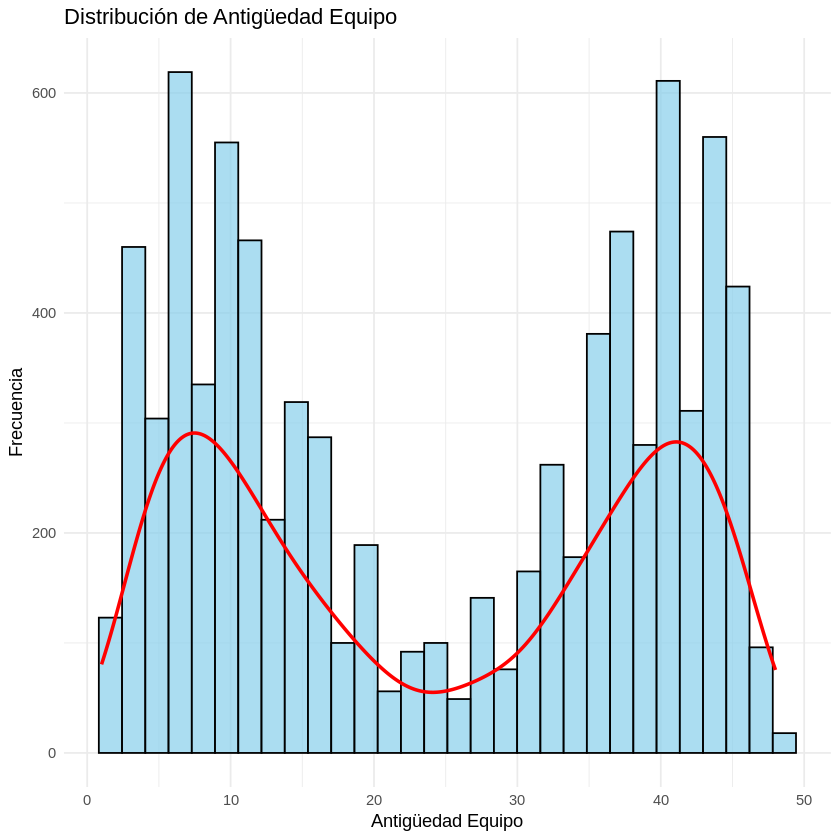

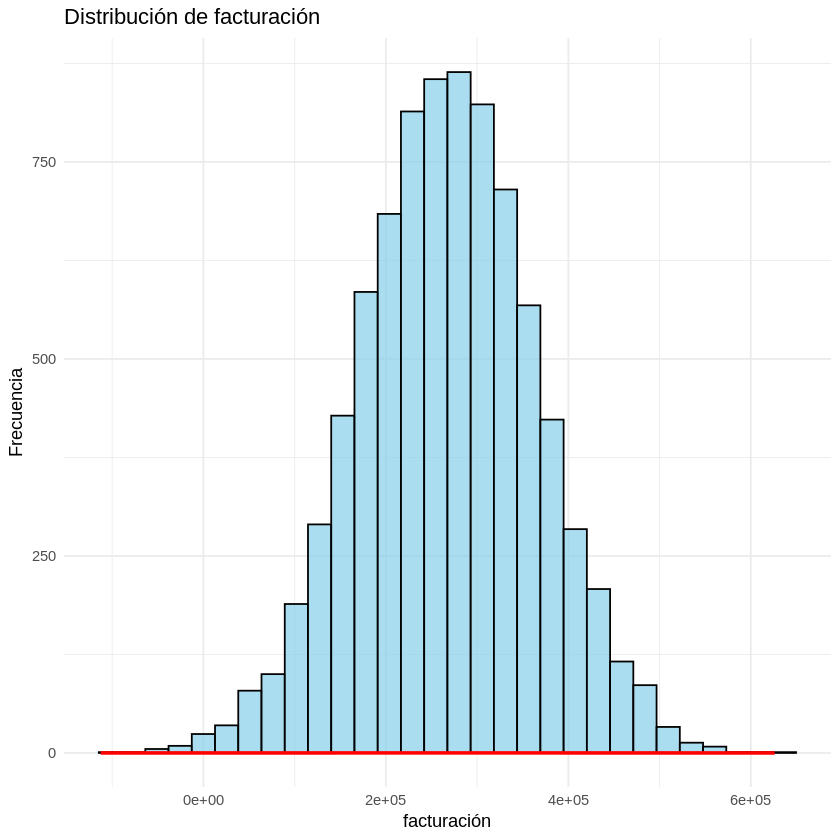

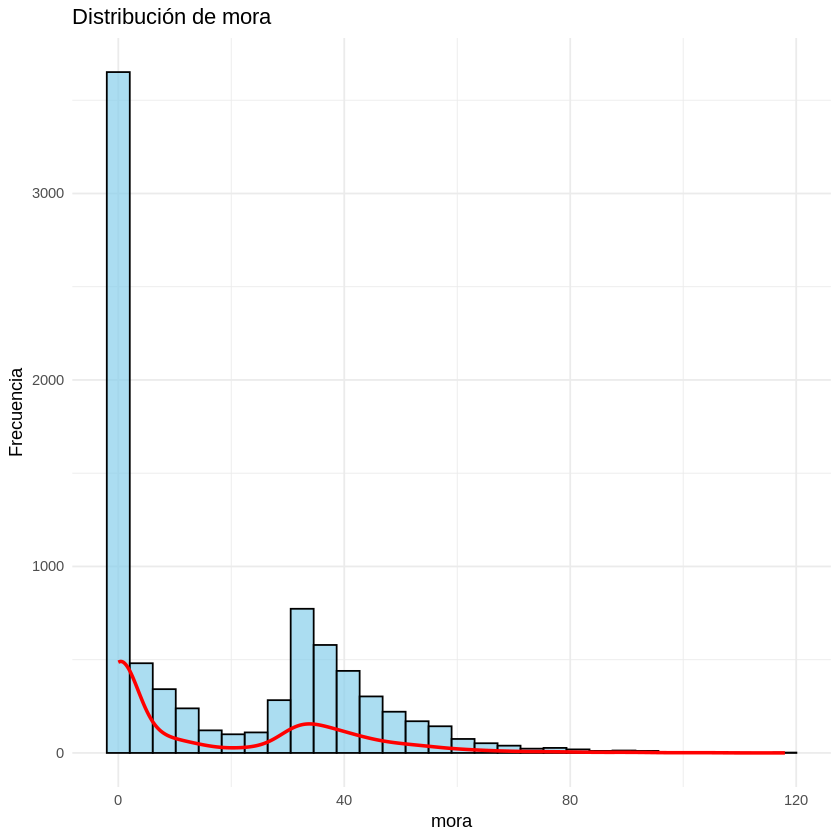

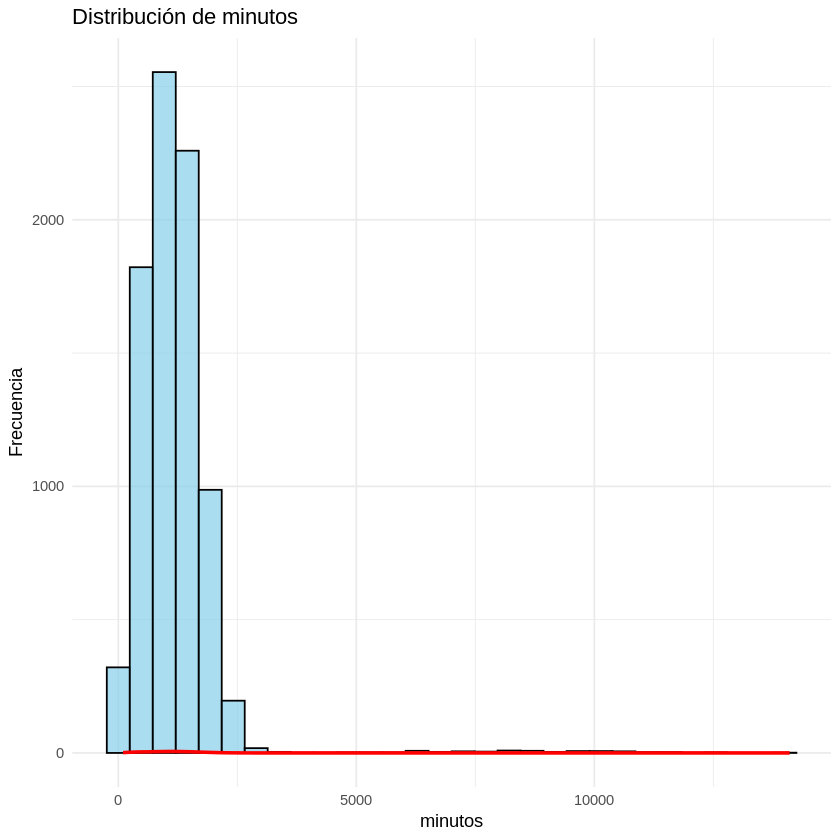

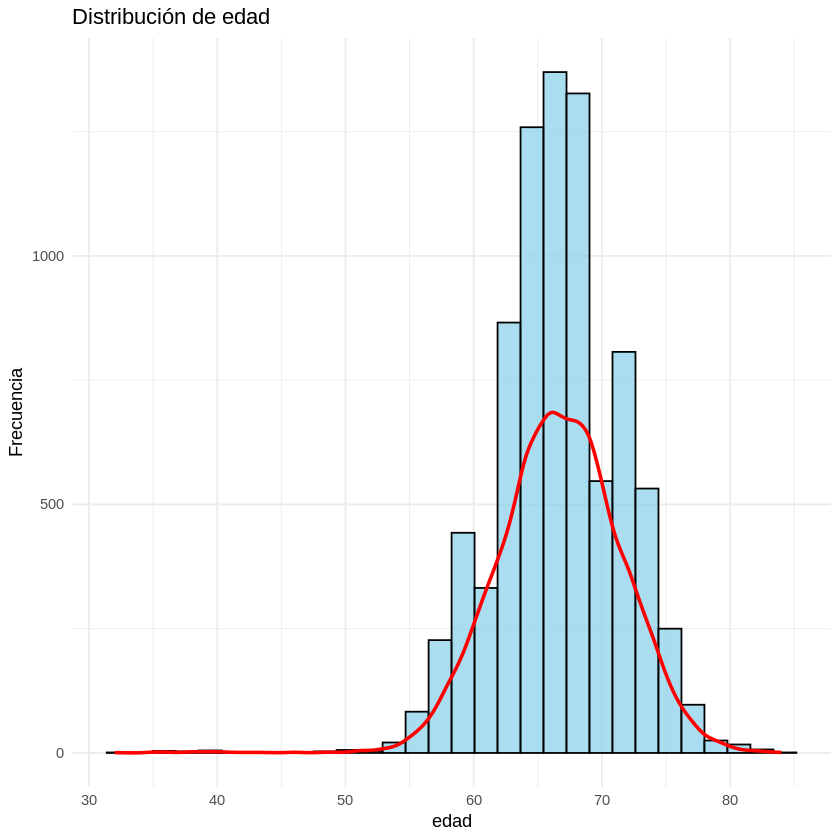

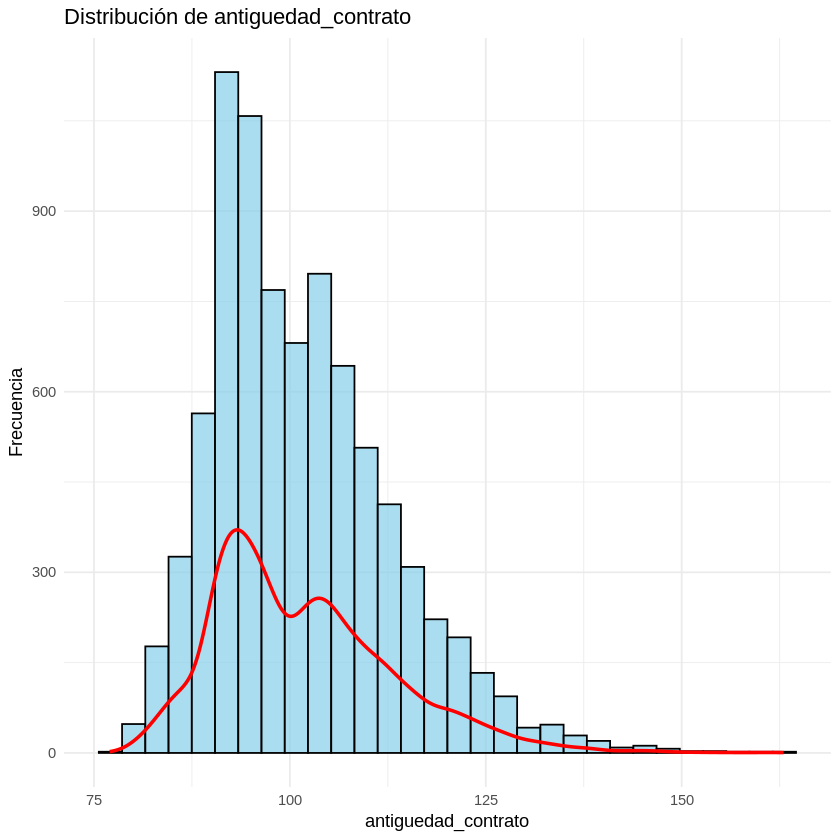

In [ ]:

numeric_cols <- df_train %>%
  select(where(is.numeric)) %>%
  names()

for (col in numeric_cols) {
  p <- ggplot(df_train, aes(x = .data[[col]])) +
    geom_histogram(bins = 30, fill = "skyblue", color = "black", alpha = 0.7) +
    geom_density(aes(y = ..count..), color = "red", size = 1) +
    labs(title = paste("Distribución de", col), x = col, y = "Frecuencia") +
    theme_minimal()
  print(p)
}


Los clientes empresariales tienenden a desertar mas

In [ ]:
# Función para detectar outliers usando el rango intercuartílico
detectar_outliers <- function(df, col) {
  Q1 <- quantile(df[[col]], 0.25, na.rm = TRUE)
  Q3 <- quantile(df[[col]], 0.75, na.rm = TRUE)
  IQR <- Q3 - Q1
  outliers <- df[df[[col]] < (Q1 - 1.5 * IQR) | df[[col]] > (Q3 + 1.5 * IQR), ]
  return(outliers)
}

# Obtener las columnas numéricas
numeric_cols <- names(df_train)[sapply(df_train, is.numeric)]

# Revisar columnas con posibles outliers
for (col in numeric_cols) {
  outliers <- detectar_outliers(df_train, col)
  cat(col, "→", nrow(outliers), "outliers detectados\n")
}


Antigüedad Equipo → 0 outliers detectados
facturación → 51 outliers detectados
mora → 41 outliers detectados
minutos → 101 outliers detectados
edad → 78 outliers detectados
antiguedad_contrato → 110 outliers detectados


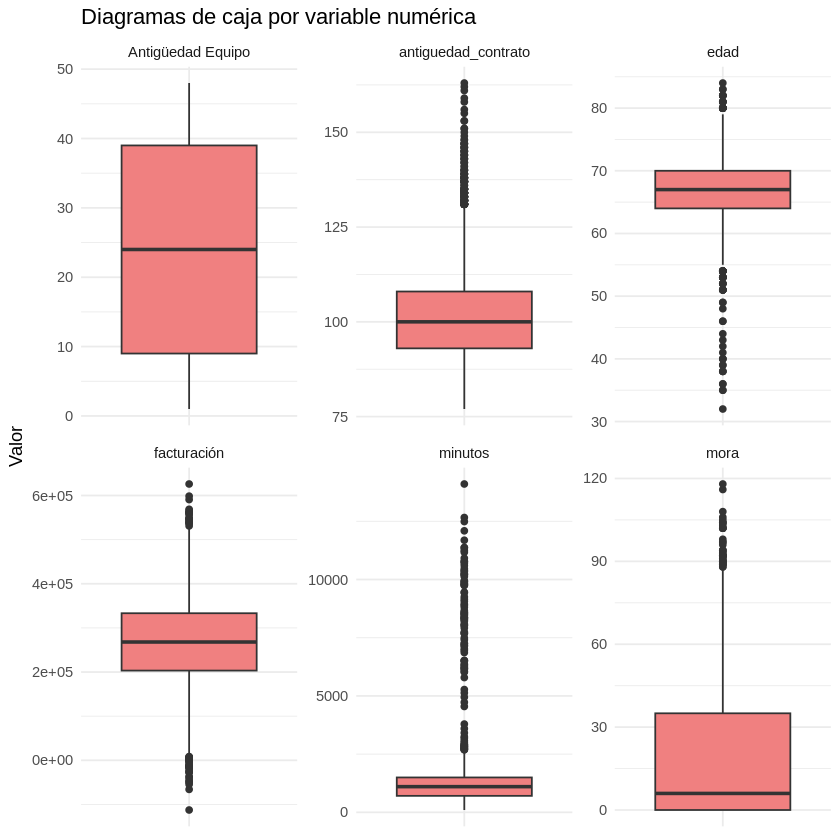

In [ ]:


numeric_cols <- df_train %>% select(where(is.numeric))

numeric_long <- numeric_cols %>%
  pivot_longer(cols = everything(), names_to = "variable", values_to = "valor")

ggplot(numeric_long, aes(x = "", y = valor)) +
  geom_boxplot(fill = "lightcoral") +
  facet_wrap(~ variable, scales = "free") +  # <-- Aquí está el cambio clave
  labs(title = "Diagramas de caja por variable numérica", x = NULL, y = "Valor") +
  theme_minimal() +
  theme(axis.text.x = element_blank(),
        axis.ticks.x = element_blank())

In [ ]:
head(df_test)

id,Fecha de nacimiento,tipo cliente,Factura online,Antigüedad Equipo,Plan de datos,facturación,mora,Fecha inicio contrato,minutos
<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<dbl>
13,1996-10-28 20:37:48,2,0,18,1,319690,0,2016-08-01 18:35:57,1202
14,1985-11-08 12:29:16,2,1,6,1,333812,0,2016-04-01 19:20:55,1403
20,1987-08-15 05:31:09,2,0,35,1,224201,43,2017-10-12 05:47:50,659
30,1981-11-06 04:06:28,1,1,11,1,210614,33,2018-02-09 20:47:49,912
37,1986-08-03 13:43:36,1,0,34,1,267116,15,2017-02-01 17:42:17,1622
47,1981-08-16 08:24:26,2,0,6,1,352465,32,2018-03-04 17:55:34,1980


In [ ]:
df_test$`Factura online`<-as.factor(df_test$`Factura online`)
df_test$`Plan de datos`<-as.factor(df_test$`Plan de datos`)
df_test$`tipo cliente`<-as.factor(df_test$`tipo cliente`)


In [ ]:
head(df_test)

id,Fecha de nacimiento,tipo cliente,Factura online,Antigüedad Equipo,Plan de datos,facturación,mora,Fecha inicio contrato,minutos
<dbl>,<dttm>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dttm>,<dbl>
13,1996-10-28 20:37:48,2,0,18,1,319690,0,2016-08-01 18:35:57,1202
14,1985-11-08 12:29:16,2,1,6,1,333812,0,2016-04-01 19:20:55,1403
20,1987-08-15 05:31:09,2,0,35,1,224201,43,2017-10-12 05:47:50,659
30,1981-11-06 04:06:28,1,1,11,1,210614,33,2018-02-09 20:47:49,912
37,1986-08-03 13:43:36,1,0,34,1,267116,15,2017-02-01 17:42:17,1622
47,1981-08-16 08:24:26,2,0,6,1,352465,32,2018-03-04 17:55:34,1980


In [ ]:
# Calcular edad del cliente
df_test$edad <- as.numeric(difftime(Sys.Date(), as.Date(df_test$`Fecha de nacimiento`), units = "days")) %/% 365

# Antigüedad del contrato en meses
df_test$antiguedad_contrato <- as.numeric(difftime(Sys.Date(), as.Date(df_test$`Fecha inicio contrato`), units = "days")) %/% 30


In [ ]:
df_test <- df_test[,c(-2,-9)]

In [ ]:
head(df_test)

id,tipo cliente,Factura online,Antigüedad Equipo,Plan de datos,facturación,mora,minutos,edad,antiguedad_contrato
<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
13,2,0,18,1,319690,0,1202,28,107
14,2,1,6,1,333812,0,1403,39,111
20,2,0,35,1,224201,43,659,37,93
30,1,1,11,1,210614,33,912,43,89
37,1,0,34,1,267116,15,1622,38,101
47,2,0,6,1,352465,32,1980,43,88


In [ ]:
sum(is.na(df_test))

[1] 0

Se quitan los espacios de los titulos de las variables para que no existan errores en los modelos posteriores

In [ ]:

df_train <- df_train %>%
  rename(tipo_cliente = `tipo cliente`)

df_test <- df_test %>%
  rename(tipo_cliente = `tipo cliente`)



df_train <- df_train %>%
  rename(Factura_online = `Factura online`)

df_test <- df_test %>%
  rename(Factura_online = `Factura online`)

In [ ]:

df_train <- df_train %>%
  rename(Antiguedad_Equipo = `Antigüedad Equipo`)

df_test <- df_test %>%
  rename(Antiguedad_Equipo = `Antigüedad Equipo`)

In [ ]:

df_train <- df_train %>%
  rename(Plan_de_datos = `Plan de datos`)

df_test <- df_test %>%
  rename(Plan_de_datos = `Plan de datos`)

ELIMINACIÓN DE OUTLIERS Y BALANCEO DE DATOS

Para probar si al eliminar outliers mejora el AUC de los mejores modelos

Sin embargo tiene sentido que en este contexto de negocio los outliers sean valores importantes y no errores de digitación.

In [ ]:
df_train_out <- df_train


In [ ]:


# Obtener las columnas numéricas
numeric_cols <- names(df_train_out)[sapply(df_train, is.numeric)]

# Revisar columnas con posibles outliers
for (col in numeric_cols) {
  outliers <- detectar_outliers(df_train_out, col)
  cat(col, "→", nrow(outliers), "outliers detectados\n")
}


Antiguedad_Equipo → 0 outliers detectados
facturación → 51 outliers detectados
mora → 41 outliers detectados
minutos → 101 outliers detectados
edad → 78 outliers detectados
antiguedad_contrato → 110 outliers detectados


In [ ]:
# Función para detectar outliers por IQR en una columna
detectar_outliers <- function(df, col_name) {
  x <- df[[col_name]]
  Q1 <- quantile(x, 0.25, na.rm = TRUE)
  Q3 <- quantile(x, 0.75, na.rm = TRUE)
  IQR <- Q3 - Q1

  lower_bound <- Q1 - 1.5 * IQR
  upper_bound <- Q3 + 1.5 * IQR

  # Filas donde el valor está fuera del rango
  outlier_rows <- which(x < lower_bound | x > upper_bound)
  return(outlier_rows)
}

# Columnas numéricas
numeric_cols <- names(df_train_out)[sapply(df_train_out, is.numeric)]

# Vector lógico para marcar filas a eliminar
rows_to_remove <- rep(FALSE, nrow(df_train_out))

for (col in numeric_cols) {
  outlier_rows <- detectar_outliers(df_train_out, col)
  rows_to_remove[outlier_rows] <- TRUE
}

# Dataframe limpio, sin outliers
df_train_out <- df_train_out[!rows_to_remove, ]


cat("Filas sin outliers:", nrow(df_train_out), "\n")


Filas sin outliers: 7871 


In [ ]:
# Revisar columnas con posibles outliers
for (col in numeric_cols) {
  outliers <- detectar_outliers(df_train_out, col)
  cat(col, "→", nrow(outliers), "outliers detectados\n")
}

Antiguedad_Equipo → outliers detectados
facturación → outliers detectados
mora → outliers detectados
minutos → outliers detectados
edad → outliers detectados
antiguedad_contrato → outliers detectados


In [ ]:

set.seed(123)

# Divide datos de entrenamiento en train/validación del data frame sin outliers
index <- createDataPartition(df_train_out$resultado, p = 0.8, list = FALSE)
train_split_out <- df_train_out[index, ]
valid_split_out <- df_train_out[-index, ]


In [ ]:
head(valid_split_out)

tipo_cliente,Factura_online,Antiguedad_Equipo,Plan_de_datos,facturación,mora,minutos,resultado,edad,antiguedad_contrato
<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
2,1,13,1,310672,10,1547,0,70,95
2,1,17,1,335172,0,1639,0,65,123
2,1,7,0,219843,30,899,1,72,97
3,0,19,1,251106,56,1420,0,65,82
1,1,2,1,333714,3,1558,0,65,98
2,1,10,1,207361,0,763,0,73,114


# ENTRENAMIENTO DE MODELOS

En la mayoria de modelos se hara validación cruzada y grid search, con el fin de encontrar los mejores parametros en cada modelo y reducir la posiblidad de sobreentrenamiento

MODELO BAGGING

In [ ]:
# Define los valores de nbagg que quieres probar
n_arboles <- c(10,25, 50, 100, 200,500)
auc_resultados <- numeric(length(n_arboles))

set.seed(123)

# Divide datos de entrenamiento en train/validación del data frame con outliers
index <- createDataPartition(df_train$resultado, p = 0.8, list = FALSE)
train_split <- df_train[index, ]
valid_split <- df_train[-index, ]

for (i in seq_along(n_arboles)) {
  modelo <- bagging(
    formula = resultado ~ .,
    data = train_split,
    nbagg = n_arboles[i],
    coob = TRUE
  )

  # Predicción de probabilidades en conjunto de validación
  probas <- predict(modelo, newdata = valid_split, type = "prob")[, 2]

  # Calcular AUC
  auc <- roc(valid_split$resultado, probas)$auc
  auc_resultados[i] <- auc
  cat("nbagg =", n_arboles[i], "-> AUC =", round(auc, 4), "\n")
}

# Mejor número de árboles
mejor_nbagg <- n_arboles[which.max(auc_resultados)]
cat("Mejor número de árboles:", mejor_nbagg, "con AUC =", round(max(auc_resultados), 4), "\n")

Setting levels: control = 0, case = 1

Setting direction: controls < cases



nbagg = 10 -> AUC = 0.7994 


Setting levels: control = 0, case = 1

Setting direction: controls < cases



nbagg = 25 -> AUC = 0.8196 


Setting levels: control = 0, case = 1

Setting direction: controls < cases



nbagg = 50 -> AUC = 0.8133 


Setting levels: control = 0, case = 1

Setting direction: controls < cases



nbagg = 100 -> AUC = 0.8242 


Setting levels: control = 0, case = 1

Setting direction: controls < cases



nbagg = 200 -> AUC = 0.8273 


Setting levels: control = 0, case = 1

Setting direction: controls < cases



nbagg = 500 -> AUC = 0.8292 
Mejor número de árboles: 500 con AUC = 0.8292 


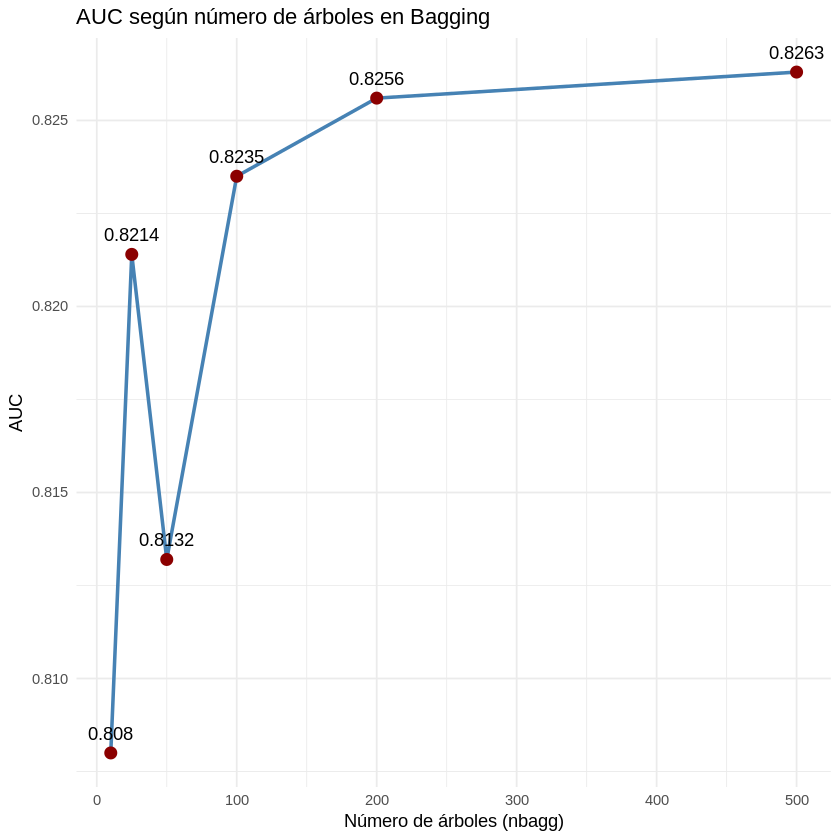

In [ ]:
# Crear un dataframe con los resultados del Grid Search
resultados_auc <- data.frame(
  nbagg = c(10, 25, 50, 100, 200, 500),
  AUC = c(0.808, 0.8214, 0.8132, 0.8235, 0.8256, 0.8263)
)



ggplot(resultados_auc, aes(x = nbagg, y = AUC)) +
  geom_line(color = "steelblue", size = 1) +
  geom_point(color = "darkred", size = 3) +
  geom_text(aes(label = round(AUC, 4)), vjust = -1) +
  labs(
    title = "AUC según número de árboles en Bagging",
    x = "Número de árboles (nbagg)",
    y = "AUC"
  ) +
  theme_minimal()


In [ ]:
# Entrenar el modelo # 500 arboles por defecto
set.seed(123)
modelo_bagging <- bagging(
  formula = resultado ~ .,
  data = train_split,
  nbagg = 500,
  coob = TRUE

)

In [ ]:
# Predecir
predicciones <- predict(modelo_bagging, newdata = df_test)

head(predicciones)


[1] 0 0 0 0 0 0
Levels: 0 1

Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "AUC validación: 0.829920485636115"


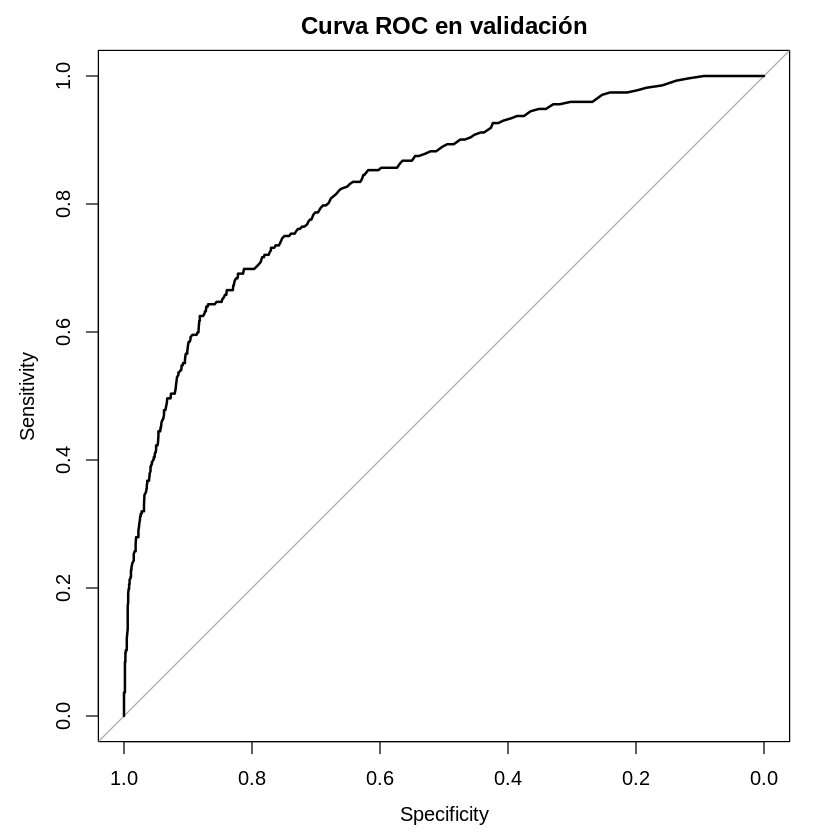

In [ ]:

# Predecir probabilidades para clase "1" en valid_data
prob_valid <- predict(modelo_bagging, newdata = valid_split, type = "prob")[, "1"]

# Curva ROC
roc_obj <- roc(response = valid_split$resultado, predictor = prob_valid)

# Graficar
plot(roc_obj, main = "Curva ROC en validación")
print(paste("AUC validación:", auc(roc_obj)))


RAMDOM FOREST

In [ ]:

set.seed(123)
rfc1 <- randomForest(resultado ~. , data = train_split, ntree = 100, importance = TRUE)


print(rfc1)




Call:
 randomForest(formula = resultado ~ ., data = train_split, ntree = 100,      importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 100
No. of variables tried at each split: 3

        OOB estimate of  error rate: 13.28%
Confusion matrix:
     0   1 class.error
0 5338 168  0.03051217
1  708 381  0.65013774


In [ ]:
# Predecir probabilidades (probabilidad de clase "1")
probas_rf <- predict(rfc1, newdata = df_test, type = "prob")[, "1"]


head(probas_rf)


1    2    3    4    5    6 
0.24 0.22 0.05 0.03 0.23 0.15

Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "AUC Random Forest: 0.842158911166211"


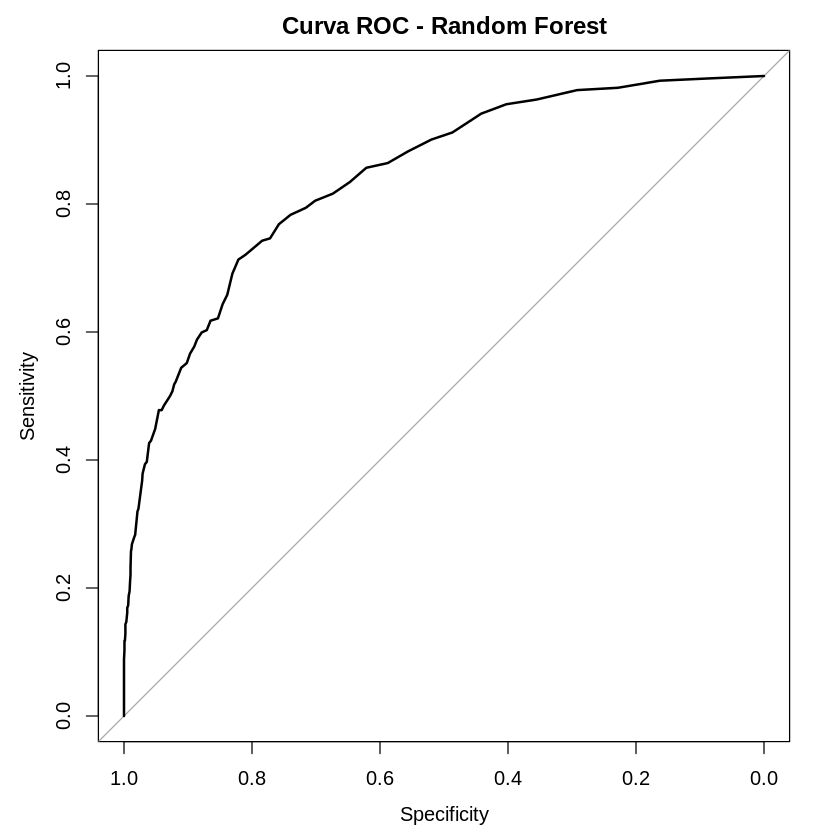

In [ ]:


# Predecir en validación
probas_valid_rf <- predict(rfc1, newdata = valid_split, type = "prob")[, "1"]

# Curva ROC
roc_rf <- roc(valid_split$resultado, probas_valid_rf)


plot(roc_rf, main = "Curva ROC - Random Forest")
print(paste("AUC Random Forest:", auc(roc_rf)))


Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



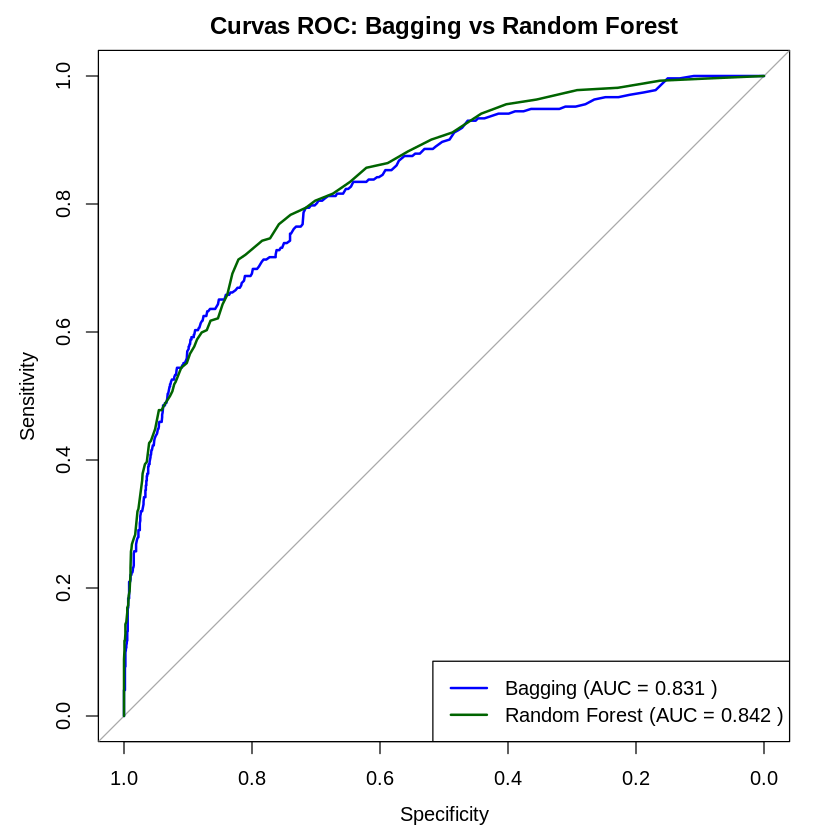

In [ ]:

# Predecir con Bagging
probas_bagging <- predict(modelo_bagging, newdata = valid_split, type = "prob")[, "1"]
roc_bagging <- roc(valid_split$resultado, probas_bagging)

# Predecir con Random Forest
probas_rf <- predict(rfc1, newdata = valid_split, type = "prob")[, "1"]
roc_rf <- roc(valid_split$resultado, probas_rf)

# Graficar ambas curvas
plot(roc_bagging, col = "blue", main = "Curvas ROC: Bagging vs Random Forest")
lines(roc_rf, col = "darkgreen")

legend("bottomright",
       legend = c(paste("Bagging (AUC =", round(auc(roc_bagging), 3), ")"),
                  paste("Random Forest (AUC =", round(auc(roc_rf), 3), ")")),
       col = c("blue", "darkgreen"),
       lwd = 2)


In [ ]:


levels(train_split$resultado) <- c("Class_0", "Class_1")
set.seed(123)
control <- trainControl(method = "cv", number = 5, classProbs = TRUE, summaryFunction = twoClassSummary)
modelo_cv <- train(resultado ~ ., data = train_split, method = "rf", trControl = control, metric = "ROC")




In [ ]:
print(modelo_cv)


Random Forest 

6595 samples
   9 predictor
   2 classes: 'Class_0', 'Class_1' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 5276, 5277, 5275, 5276, 5276 
Resampling results across tuning parameters:

  mtry  ROC        Sens       Spec     
   2    0.8417179  0.9900114  0.2148861
   6    0.8396309  0.9673077  0.3682704
  10    0.8347191  0.9618606  0.3765527

ROC was used to select the optimal model using the largest value.
The final value used for the model was mtry = 2.


In [ ]:
modelo_cv$results


,mtry,ROC,Sens,Spec,ROCSD,SensSD,SpecSD
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2,0.8417179,0.9900114,0.2148861,0.01658412,0.002565906,0.02074824
2,6,0.8396309,0.9673077,0.3682704,0.01280768,0.004118184,0.03120165
3,10,0.8347191,0.9618606,0.3765527,0.01226467,0.004666198,0.03882477


In [ ]:
modelo_cv$bestTune


,mtry
,<dbl>
1,2


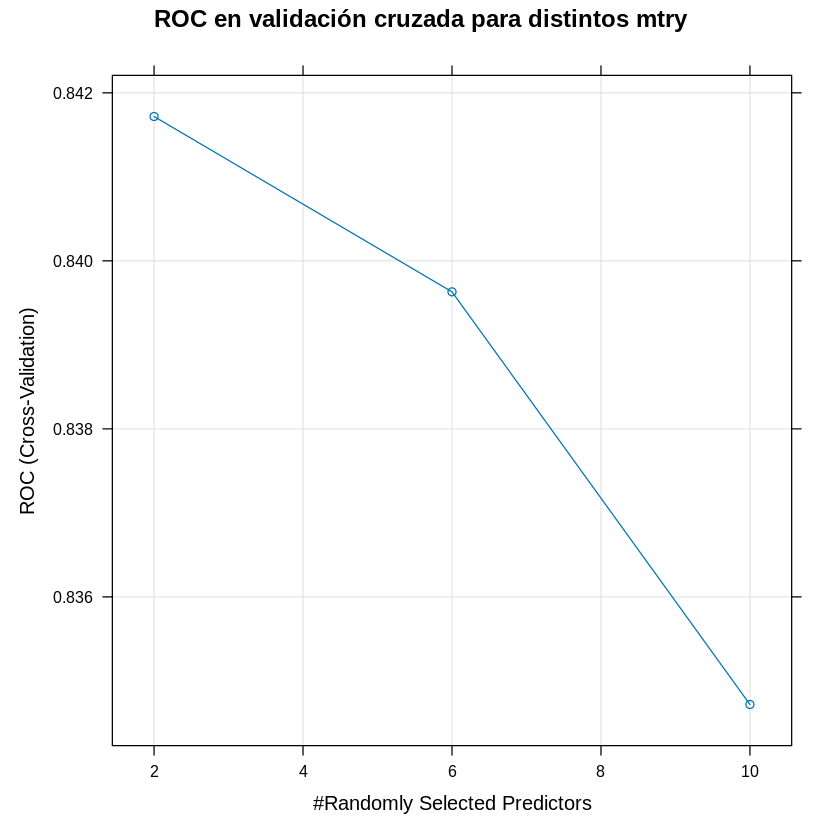

In [ ]:
plot(modelo_cv, main = "ROC en validación cruzada para distintos mtry")


Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "AUC validación: 0.848716975889193"


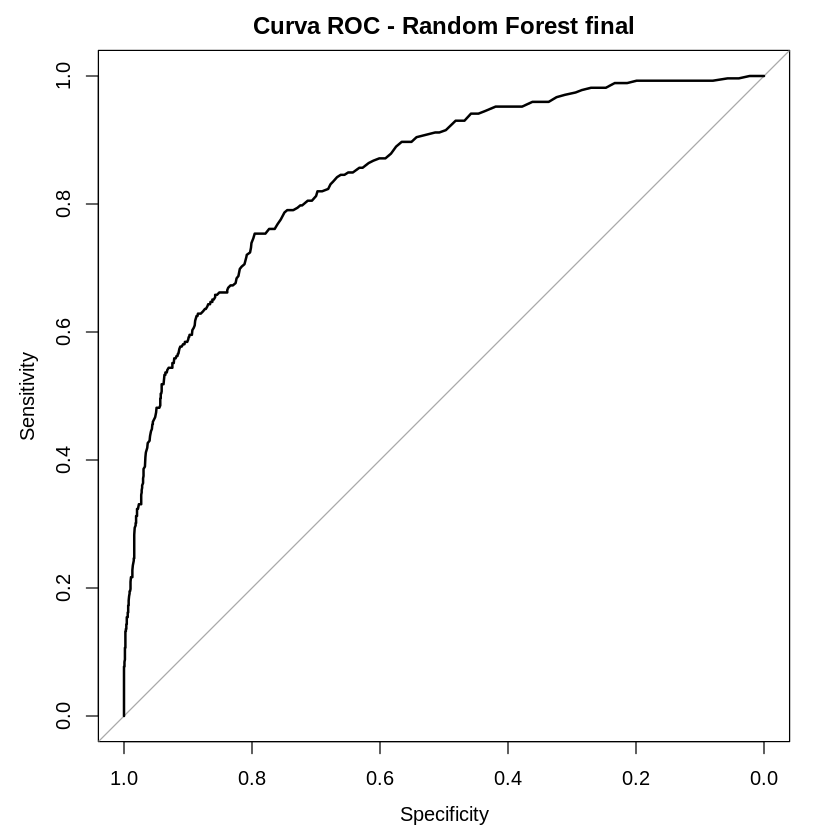

In [ ]:

# Predecir probabilidades para validación
probas_valid_rf <- predict(modelo_cv, newdata = valid_split, type = "prob")[, "Class_1"]

# Curva ROC
roc_rf <- roc(valid_split$resultado, probas_valid_rf)
plot(roc_rf, main = "Curva ROC - Random Forest final")
print(paste("AUC validación:", auc(roc_rf)))

In [ ]:
# Define the tuning grid for the randomForest method
grid <- expand.grid(
  mtry = c(2, 4, 6, 8) # The 'rf' method only tunes 'mtry'
)

# You can keep the control object as it is
control <- trainControl(
  method = "cv",                 # Validación cruzada
  number = 5,                    # 5-fold CV
  classProbs = TRUE,            # Para calcular AUC
  summaryFunction = twoClassSummary,
  verboseIter = TRUE
)

# Train the model
set.seed(123)

modelo_rf <- train(
  resultado ~ .,
  data = train_split,
  method = "rf", # Using the randomForest package
  metric = "ROC",                   # Evaluamos según AUC
  tuneGrid = grid, # Now only contains 'mtry'
  trControl = control,
  #ntree = 500                       # Puedes ajustar esto también si no quieres usar el valor por defecto
)

+ Fold1: mtry=2 
- Fold1: mtry=2 
+ Fold1: mtry=4 
- Fold1: mtry=4 
+ Fold1: mtry=6 
- Fold1: mtry=6 
+ Fold1: mtry=8 
- Fold1: mtry=8 
+ Fold2: mtry=2 
- Fold2: mtry=2 
+ Fold2: mtry=4 
- Fold2: mtry=4 
+ Fold2: mtry=6 
- Fold2: mtry=6 
+ Fold2: mtry=8 
- Fold2: mtry=8 
+ Fold3: mtry=2 
- Fold3: mtry=2 
+ Fold3: mtry=4 
- Fold3: mtry=4 
+ Fold3: mtry=6 
- Fold3: mtry=6 
+ Fold3: mtry=8 
- Fold3: mtry=8 
+ Fold4: mtry=2 
- Fold4: mtry=2 
+ Fold4: mtry=4 
- Fold4: mtry=4 
+ Fold4: mtry=6 
- Fold4: mtry=6 
+ Fold4: mtry=8 
- Fold4: mtry=8 
+ Fold5: mtry=2 
- Fold5: mtry=2 
+ Fold5: mtry=4 
- Fold5: mtry=4 
+ Fold5: mtry=6 
- Fold5: mtry=6 
+ Fold5: mtry=8 
- Fold5: mtry=8 
Aggregating results
Selecting tuning parameters
Fitting mtry = 2 on full training set


Random Forest 

6595 samples
   9 predictor
   2 classes: 'Class_0', 'Class_1' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 5276, 5277, 5275, 5276, 5276 
Resampling results across tuning parameters:

  mtry  ROC        Sens       Spec     
  2     0.8416759  0.9911013  0.2148861
  4     0.8415979  0.9723935  0.3434575
  6     0.8391473  0.9662185  0.3627489
  8     0.8378906  0.9653110  0.3701095

ROC was used to select the optimal model using the largest value.
The final value used for the model was mtry = 2.


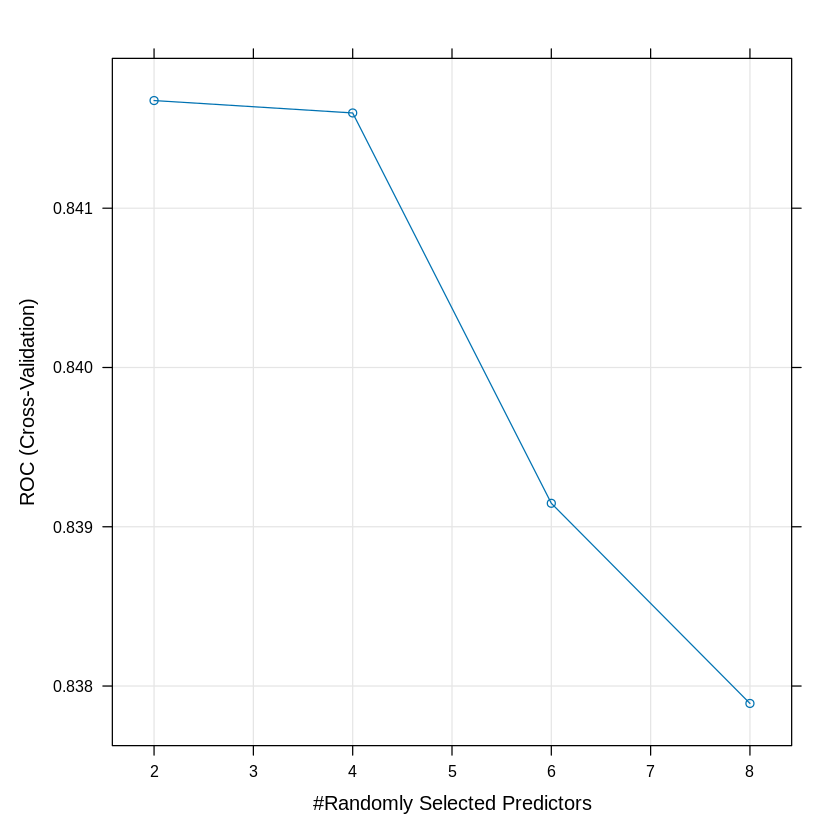

In [ ]:
print(modelo_rf)
plot(modelo_rf)


Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "AUC validación: 0.846079856361149"


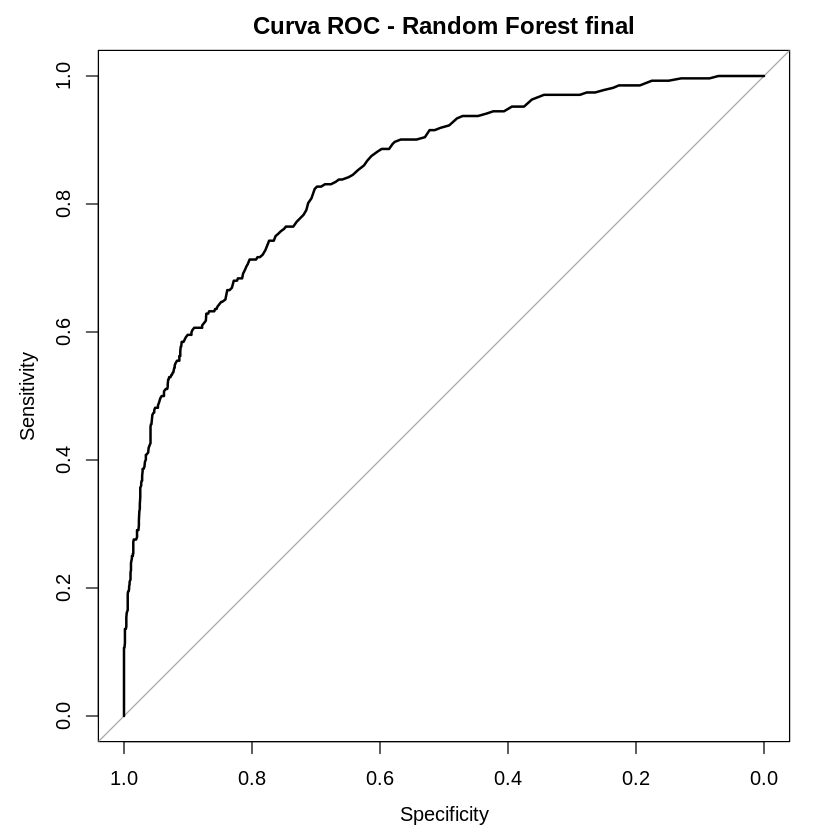

In [ ]:
# Predecir probabilidades
probas_valid <- predict(modelo_rf, newdata = valid_split, type = "prob")[, "Class_1"]

# Calcular y graficar curva ROC
roc_rf <- roc(valid_split$resultado, probas_valid)
plot(roc_rf, main = "Curva ROC - Random Forest final")
print(paste("AUC validación:", auc(roc_rf)))


MODELO GBM

Con data frame con outliers

In [ ]:
levels(train_split$resultado) <- c("Class_0", "Class_1")
# Configuración para validación cruzada
control <- trainControl(
  method = "cv",
  number = 5,
  classProbs = TRUE,
  summaryFunction = twoClassSummary,
  verboseIter = TRUE
)

# Grid de hiperparámetros
grid <- expand.grid(
  n.trees = c(100, 200, 500),
  interaction.depth = c(1, 3, 5),
  shrinkage = c(0.05, 0.1),
  n.minobsinnode = 10
)

# Entrenamiento con caret
set.seed(123)
modelo_gbm <- train(
  resultado ~ .,
  data = train_split,
  method = "gbm",
  trControl = control,
  tuneGrid = grid,
  metric = "ROC",
  verbose = FALSE
)

# Ver los mejores hiperparámetros
print(modelo_gbm)

+ Fold1: shrinkage=0.05, interaction.depth=1, n.minobsinnode=10, n.trees=500 
- Fold1: shrinkage=0.05, interaction.depth=1, n.minobsinnode=10, n.trees=500 
+ Fold1: shrinkage=0.05, interaction.depth=3, n.minobsinnode=10, n.trees=500 
- Fold1: shrinkage=0.05, interaction.depth=3, n.minobsinnode=10, n.trees=500 
+ Fold1: shrinkage=0.05, interaction.depth=5, n.minobsinnode=10, n.trees=500 
- Fold1: shrinkage=0.05, interaction.depth=5, n.minobsinnode=10, n.trees=500 
+ Fold1: shrinkage=0.10, interaction.depth=1, n.minobsinnode=10, n.trees=500 
- Fold1: shrinkage=0.10, interaction.depth=1, n.minobsinnode=10, n.trees=500 
+ Fold1: shrinkage=0.10, interaction.depth=3, n.minobsinnode=10, n.trees=500 
- Fold1: shrinkage=0.10, interaction.depth=3, n.minobsinnode=10, n.trees=500 
+ Fold1: shrinkage=0.10, interaction.depth=5, n.minobsinnode=10, n.trees=500 
- Fold1: shrinkage=0.10, interaction.depth=5, n.minobsinnode=10, n.trees=500 
+ Fold2: shrinkage=0.05, interaction.depth=1, n.minobsinnode=10,

Setting levels: control = Class_0, case = Class_1

Setting direction: controls < cases



[1] "AUC validación: 0.886144301470588"


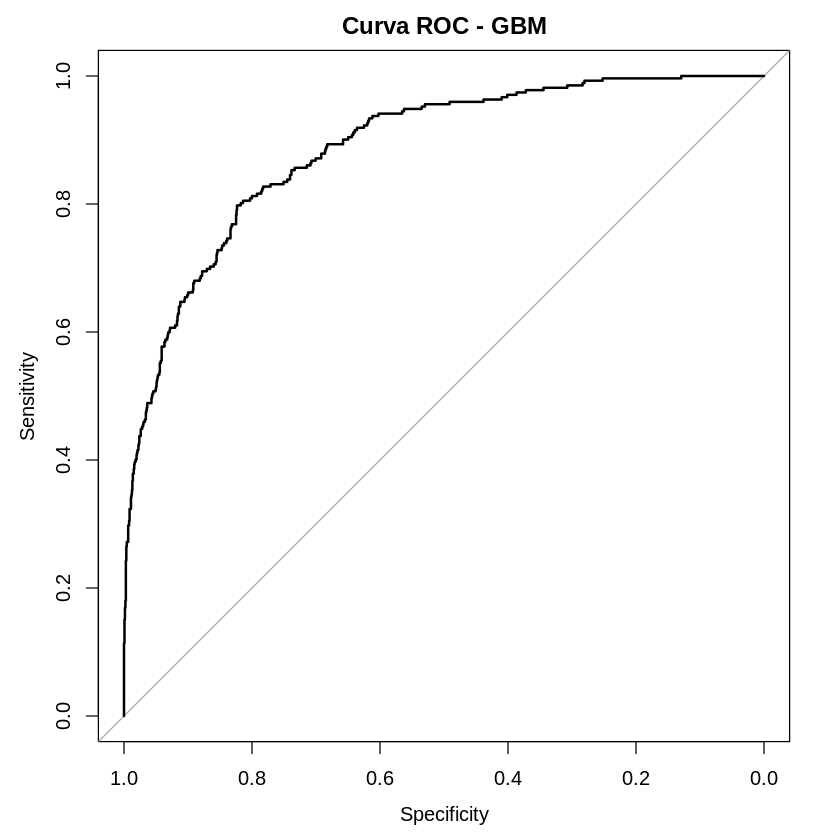

In [ ]:
# Asegúrate de tener valid_split con la columna resultado
valid_split$resultado <- factor(valid_split$resultado, levels = c(0, 1), labels = c("Class_0", "Class_1"))

# Predecir probabilidades
probas_gbm <- predict(modelo_gbm, newdata = valid_split, type = "prob")[, "Class_1"]

# Curva ROC
roc_gbm <- roc(valid_split$resultado, probas_gbm)
plot(roc_gbm, main = "Curva ROC - GBM")
print(paste("AUC validación:", auc(roc_gbm)))


Setting levels: control = Class_0, case = Class_1

Setting direction: controls < cases



AUC validación: 0.8861443 
Mejor umbral de probabilidad: 0.1759 
Tamaño clases_predichas: 1648 
Tamaño valid_split$resultado: 1648 


Confusion Matrix and Statistics

          Reference
Prediction Class_0 Class_1
   Class_0    1133      55
   Class_1     243     217
                                          
               Accuracy : 0.8192          
                 95% CI : (0.7997, 0.8375)
    No Information Rate : 0.835           
    P-Value [Acc > NIR] : 0.9594          
                                          
                  Kappa : 0.4863          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.7978          
            Specificity : 0.8234          
         Pos Pred Value : 0.4717          
         Neg Pred Value : 0.9537          
             Prevalence : 0.1650          
         Detection Rate : 0.1317          
   Detection Prevalence : 0.2791          
      Balanced Accuracy : 0.8106          
                                          
       'Positive' Class : Class_1         
      

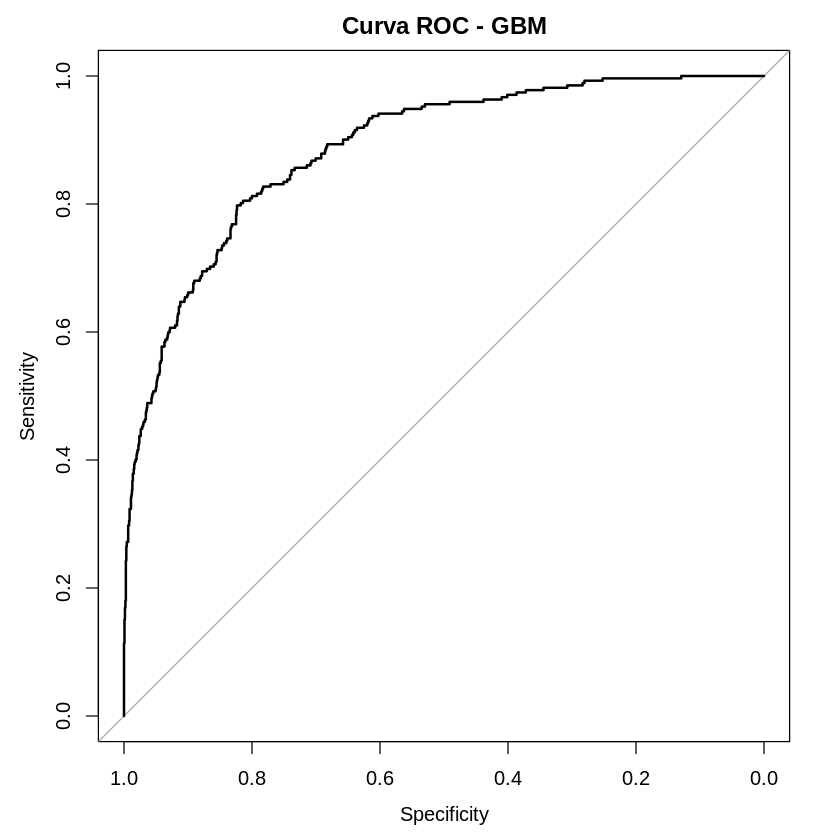

In [ ]:

roc_gbm <- roc(valid_split$resultado, probas_gbm)
plot(roc_gbm, main = "Curva ROC - GBM")
cat("AUC validación:", auc(roc_gbm), "\n")

# Extraer el mejor umbral de probabilidad
mejor_umbral <- as.numeric(coords(roc_gbm, "best", ret = "threshold"))
cat("Mejor umbral de probabilidad:", round(mejor_umbral, 4), "\n")

# Clasificación con el mejor umbral
clases_predichas <- ifelse(probas_gbm >= mejor_umbral, "Class_1", "Class_0")
clases_predichas <- factor(clases_predichas, levels = c("Class_0", "Class_1"))

# Verificar que los vectores tengan la misma longitud
cat("Tamaño clases_predichas:", length(clases_predichas), "\n")
cat("Tamaño valid_split$resultado:", length(valid_split$resultado), "\n")

# Matriz de confusión
confusionMatrix(clases_predichas, valid_split$resultado, positive = "Class_1")

Con data frame sin outliers

In [ ]:
levels(train_split_out$resultado) <- c("Class_0", "Class_1")
# Configuración para validación cruzada
control <- trainControl(
  method = "cv",
  number = 5,
  classProbs = TRUE,
  summaryFunction = twoClassSummary,
  verboseIter = TRUE
)

# Grid de hiperparámetros
grid <- expand.grid(
  n.trees = c(100, 200, 500),
  interaction.depth = c(1, 3, 5),
  shrinkage = c(0.05, 0.1),
  n.minobsinnode = 10
)

# Entrenamiento con caret
set.seed(123)
modelo_gbm <- train(
  resultado ~ .,
  data = train_split_out,
  method = "gbm",
  trControl = control,
  tuneGrid = grid,
  metric = "ROC",
  verbose = FALSE
)

# Ver los mejores hiperparámetros
print(modelo_gbm)

+ Fold1: shrinkage=0.05, interaction.depth=1, n.minobsinnode=10, n.trees=500 
- Fold1: shrinkage=0.05, interaction.depth=1, n.minobsinnode=10, n.trees=500 
+ Fold1: shrinkage=0.05, interaction.depth=3, n.minobsinnode=10, n.trees=500 
- Fold1: shrinkage=0.05, interaction.depth=3, n.minobsinnode=10, n.trees=500 
+ Fold1: shrinkage=0.05, interaction.depth=5, n.minobsinnode=10, n.trees=500 
- Fold1: shrinkage=0.05, interaction.depth=5, n.minobsinnode=10, n.trees=500 
+ Fold1: shrinkage=0.10, interaction.depth=1, n.minobsinnode=10, n.trees=500 
- Fold1: shrinkage=0.10, interaction.depth=1, n.minobsinnode=10, n.trees=500 
+ Fold1: shrinkage=0.10, interaction.depth=3, n.minobsinnode=10, n.trees=500 
- Fold1: shrinkage=0.10, interaction.depth=3, n.minobsinnode=10, n.trees=500 
+ Fold1: shrinkage=0.10, interaction.depth=5, n.minobsinnode=10, n.trees=500 
- Fold1: shrinkage=0.10, interaction.depth=5, n.minobsinnode=10, n.trees=500 
+ Fold2: shrinkage=0.05, interaction.depth=1, n.minobsinnode=10,

Setting levels: control = Class_0, case = Class_1

Setting direction: controls < cases



[1] "AUC validación: 0.863521167638602"


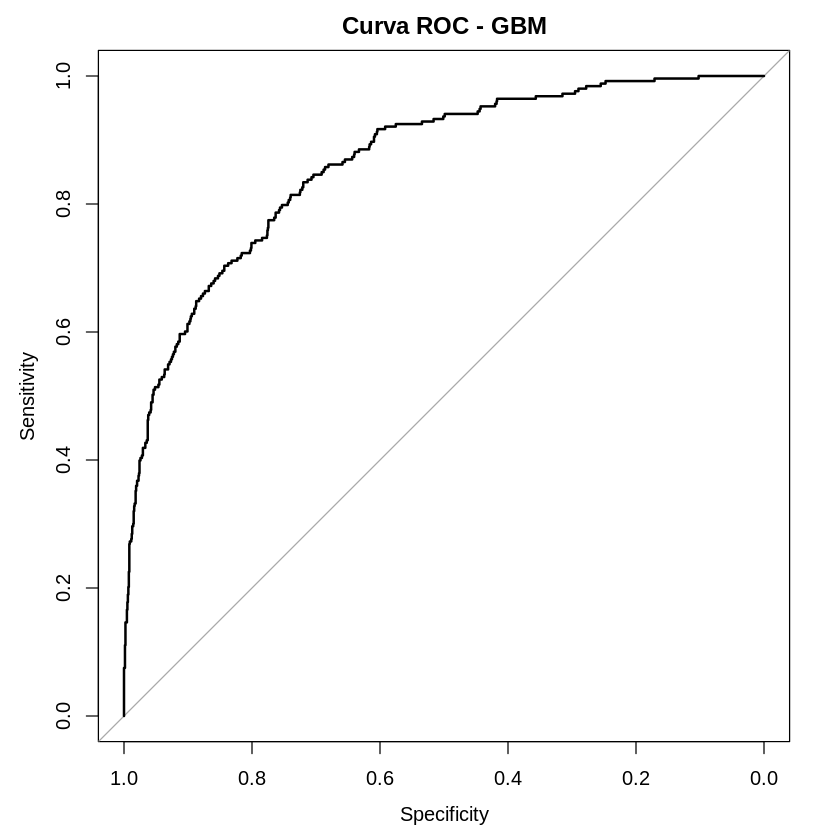

In [ ]:
# Asegúrate de tener valid_split con la columna resultado
valid_split_out$resultado <- factor(valid_split_out$resultado, levels = c(0, 1), labels = c("Class_0", "Class_1"))

# Predecir probabilidades
probas_gbm <- predict(modelo_gbm, newdata = valid_split_out, type = "prob")[, "Class_1"]

# Curva ROC
roc_gbm <- roc(valid_split_out$resultado, probas_gbm)
plot(roc_gbm, main = "Curva ROC - GBM")
print(paste("AUC validación:", auc(roc_gbm)))

XGBOOST

In [ ]:
set.seed(123)

control <- trainControl(
  method = "cv",                # Validación cruzada
  number = 5,                   # Número de folds
  classProbs = TRUE,            # Calcular probabilidades
  summaryFunction = twoClassSummary,  # Usar AUC como métrica
  verboseIter = TRUE            # Mostrar progreso
)


In [ ]:
grid <- expand.grid(
  nrounds = c(100, 200),        # Número de iteraciones (árboles)
  max_depth = c(3, 6),          # Profundidad máxima del árbol
  eta = c(0.05, 0.1),           # Learning rate
  gamma = 0,                    # Penalización por dividir nodos
  colsample_bytree = 0.8,       # Fracción de columnas (features) para cada árbol
  min_child_weight = 1,         # Mínimo de observaciones en un nodo hoja
  subsample = 0.8               # Fracción de observaciones para cada árbol
)


In [ ]:
modelo_xgb <- train(
  resultado ~ .,
  data = train_split,
  method = "xgbTree",
  trControl = control,
  metric = "ROC",     # Evaluamos con AUC
  tuneGrid = grid
)


+ Fold1: eta=0.05, max_depth=3, gamma=0, colsample_bytree=0.8, min_child_weight=1, subsample=0.8, nrounds=200 
[23:11:18] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[23:11:18] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
- Fold1: eta=0.05, max_depth=3, gamma=0, colsample_bytree=0.8, min_child_weight=1, subsample=0.8, nrounds=200 
+ Fold1: eta=0.05, max_depth=6, gamma=0, colsample_bytree=0.8, min_child_weight=1, subsample=0.8, nrounds=200 
[23:11:19] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[23:11:19] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
- Fold1: eta=0.05, max_depth=6, gamma=0, colsample_bytree=0.8, min_child_weight=1, subsample=0.8, nrounds=200 
+ Fold1: eta=0.10, max_depth=3, gamma=0, colsample_bytree=0.8, min_child_weight=1, subsample=0.8, nrounds=200 
[23:11:20] WARNING: src/c_api

eXtreme Gradient Boosting 

6595 samples
   9 predictor
   2 classes: 'Class_0', 'Class_1' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 5276, 5277, 5275, 5276, 5276 
Resampling results across tuning parameters:

  eta   max_depth  nrounds  ROC        Sens       Spec     
  0.05  3          100      0.8581742  0.9907383  0.2387815
  0.05  3          200      0.8686614  0.9807491  0.3461886
  0.05  6          100      0.8638943  0.9767532  0.3608802
  0.05  6          200      0.8628773  0.9705772  0.4104807
  0.10  3          100      0.8667524  0.9803853  0.3581195
  0.10  3          200      0.8692186  0.9723942  0.4113685
  0.10  6          100      0.8608862  0.9700322  0.4058851
  0.10  6          200      0.8521804  0.9653094  0.4114024

Tuning parameter 'gamma' was held constant at a value of 0
Tuning

Tuning parameter 'min_child_weight' was held constant at a value of 1

Tuning parameter 'subsample' was held constant at a value of 0.8
ROC wa

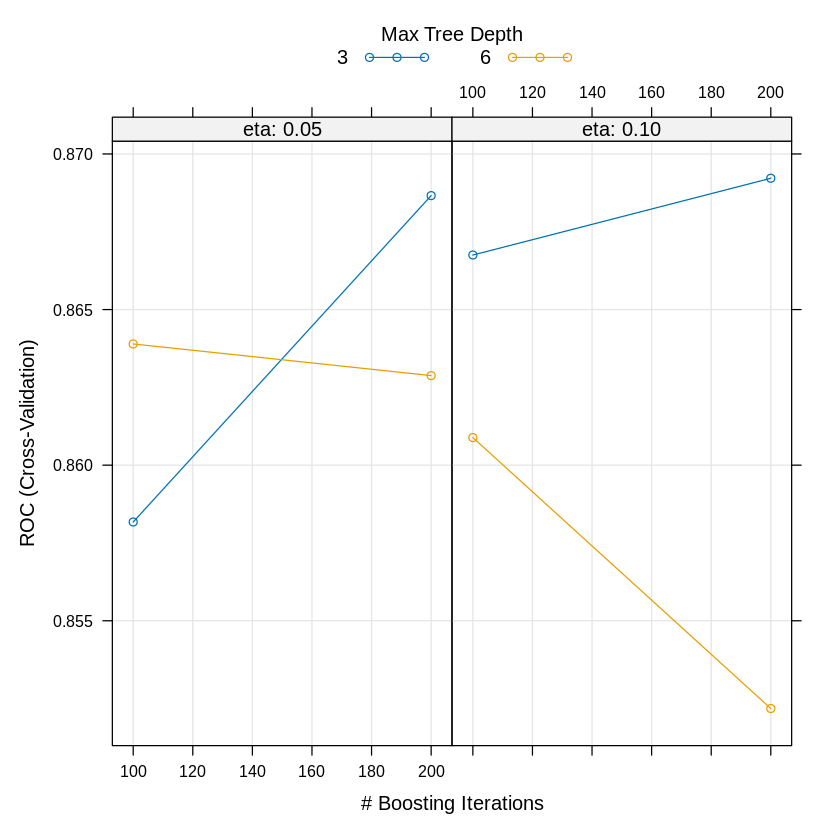

In [ ]:
print(modelo_xgb)
plot(modelo_xgb)


Setting levels: control = Class_0, case = Class_1

Setting direction: controls < cases



[1] "AUC validación: 0.88805200495896"


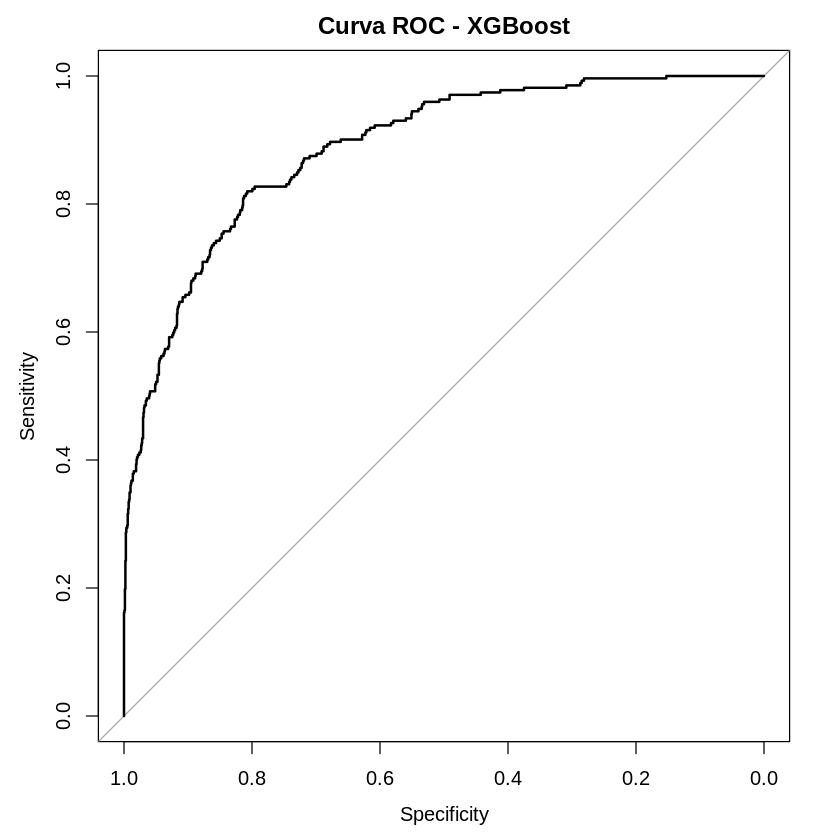

In [ ]:
# Asegúrate de que valid_split tenga el mismo preprocesamiento y niveles
probas_valid <- predict(modelo_xgb, newdata = valid_split, type = "prob")[, "Class_1"]

roc_xgb <- roc(valid_split$resultado, probas_valid)
plot(roc_xgb, main = "Curva ROC - XGBoost")
print(paste("AUC validación:", auc(roc_xgb)))


LightGBM

In [ ]:
# Convertimos a matriz numérica (LightGBM solo acepta numeric o factor codificado como int)
train_split_lgb <- model.matrix(~ . -1, data = train_split[, -which(names(train_split) == "resultado")])
valid_split_lgb <- model.matrix(~ . -1, data = valid_split[, -which(names(valid_split) == "resultado")])

# Transformar etiquetas a 0/1
label_train <- ifelse(train_split$resultado == "Class_1", 1, 0)
label_valid <- ifelse(valid_split$resultado == "Class_1", 1, 0)

# Crear datasets de LightGBM
dtrain <- lgb.Dataset(data = train_split_lgb, label = label_train)
dvalid <- lgb.Dataset(data = valid_split_lgb, label = label_valid, reference = dtrain)


In [ ]:
params <- list(
  objective = "binary",
  metric = "auc",
  num_leaves = 31,
  learning_rate = 0.1,
  feature_fraction = 0.8,
  bagging_fraction = 0.8,
  bagging_freq = 5
)

set.seed(123)

modelo_lgb <- lgb.train(
  params = params,
  data = dtrain,
  nrounds = 100,
  valids = list(valid = dvalid),
  early_stopping_rounds = 10,
  verbose = 1
)


[LightGBM] [Info] Number of positive: 1089, number of negative: 5506
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000805 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 769
[LightGBM] [Info] Number of data points in the train set: 6595, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.165125 -> initscore=-1.620579
[LightGBM] [Info] Start training from score -1.620579
[1]:  valid's auc:0.775564 
Will train until there is no improvement in 10 rounds.
[2]:  valid's auc:0.80264 
[3]:  valid's auc:0.824947 
[4]:  valid's auc:0.818724 
[5]:  valid's auc:0.836488 
[6]:  valid's auc:0.841592 
[7]:  valid's auc:0.851804 
[8]:  valid's auc:0.850578 
[9]:  valid's auc:0.855701 
[10]:  valid's auc:0.863206 
[11]:  valid's auc:0.868578 
[12]:  valid's auc:0.869326 
[13]:  valid's auc:0.869965 
[14]:  valid's auc:0.87269 
[15]:  valid's auc:0.87447 
[16]:  valid's auc:0.874213 
[17

Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "AUC validación: 0.880168700837893"


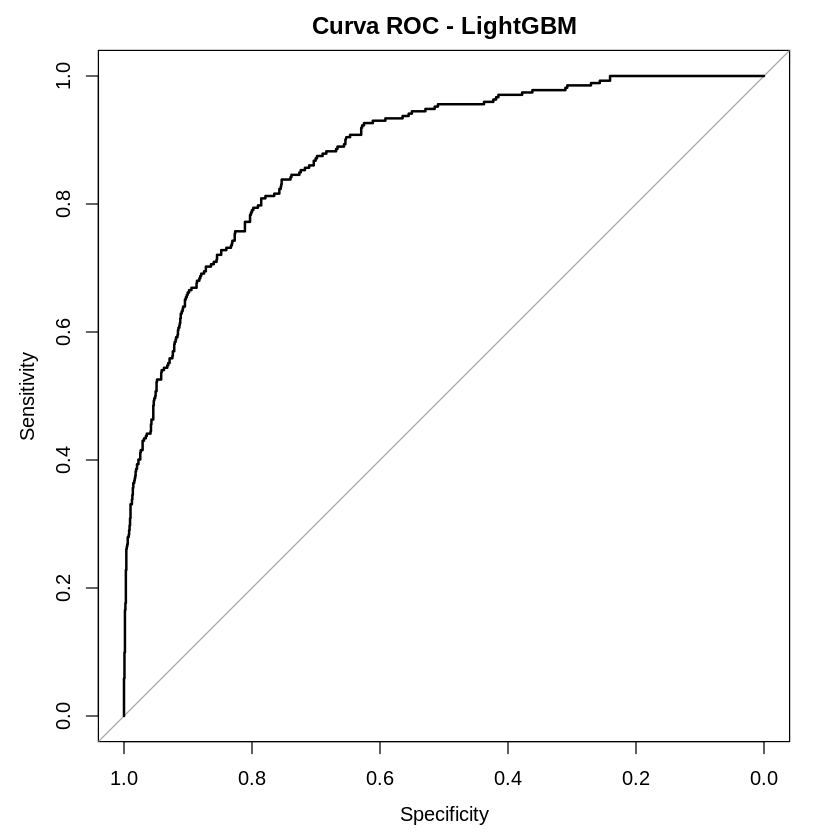

In [ ]:
# Predecir probabilidades en validación
probas_lgb <- predict(modelo_lgb, valid_split_lgb)

# Calcular AUC y graficar
roc_lgb <- roc(response = label_valid, predictor = probas_lgb)
plot(roc_lgb, main = "Curva ROC - LightGBM")
print(paste("AUC validación:", auc(roc_lgb)))


In [ ]:
# Grid manual
grid <- expand.grid(
  num_leaves = c(15, 31, 63),
  learning_rate = c(0.01, 0.05, 0.1),
  max_depth = c(-1, 5, 10)
)


In [ ]:


results <- data.frame()

for (i in 1:nrow(grid)) {
  params <- list(
    objective = "binary",
    metric = "auc",
    num_leaves = grid$num_leaves[i],
    learning_rate = grid$learning_rate[i],
    max_depth = grid$max_depth[i],
    verbosity = -1
  )

  set.seed(123)
  cv_result <- lgb.cv(
    params = params,
    data = dtrain,
    nrounds = 1000,
    nfold = 5,
    early_stopping_rounds = 10,
    verbose = 0
  )

  best_iter <- cv_result$best_iter
  best_score <- cv_result$best_score

  results <- rbind(results, data.frame(
    num_leaves = grid$num_leaves[i],
    learning_rate = grid$learning_rate[i],
    max_depth = grid$max_depth[i],
    best_iter = best_iter,
    auc = best_score
  ))
}

# Ordena para ver la mejor combinación
results[order(-results$auc), ]


,num_leaves,learning_rate,max_depth,best_iter,auc
,<dbl>,<dbl>,<dbl>,<int>,<dbl>
4,15,0.05,-1,140,0.8695332
13,15,0.05,5,186,0.8693636
25,15,0.10,10,70,0.8692736
22,15,0.05,10,137,0.8691717
1,15,0.01,-1,581,0.8687369
7,15,0.10,-1,61,0.8687002
16,15,0.10,5,81,0.8685648
14,31,0.05,5,139,0.8684887
15,63,0.05,5,139,0.8684887


In [ ]:
best_params <- list(
  objective = "binary",
  metric = "auc",
  num_leaves = 15,
  learning_rate = 0.05,
  max_depth = -1,
  verbosity = -1
)

modelo_final <- lgb.train(
  params = best_params,
  data = dtrain,
  nrounds = 140
)


Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "AUC validación: 0.880648298563611"


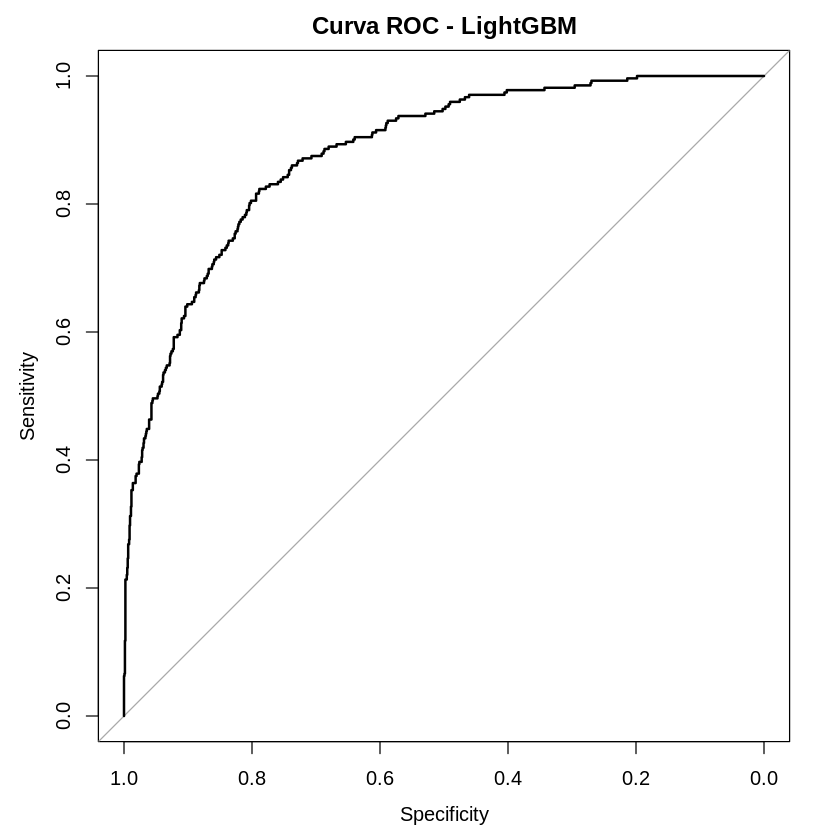

In [ ]:
# Preparar datos de validación
valid_split_lgb <- model.matrix(~ . -1, data = valid_split[, -which(names(valid_split) == "resultado")])
label_valid <- ifelse(valid_split$resultado == "Class_1", 1, 0)

# Predecir probabilidades
preds_valid <- predict(modelo_final, valid_split_lgb)

# Evaluar con curva ROC

roc_lgb <- roc(label_valid, preds_valid)
plot(roc_lgb, main = "Curva ROC - LightGBM")
print(paste("AUC validación:", auc(roc_lgb)))


REGRESION LOGISTICA

In [ ]:
set.seed(123)

modelo_log <- train(
  resultado ~ .,
  data = train_split,
  method = "glm",           # Regresión logística
  family = binomial,
  trControl = control,
  metric = "ROC"
)


+ Fold1: parameter=none 
- Fold1: parameter=none 
+ Fold2: parameter=none 
- Fold2: parameter=none 
+ Fold3: parameter=none 
- Fold3: parameter=none 
+ Fold4: parameter=none 
- Fold4: parameter=none 
+ Fold5: parameter=none 
- Fold5: parameter=none 
Aggregating results
Fitting final model on full training set


In [ ]:
print(modelo_log)


Generalized Linear Model 

6595 samples
   9 predictor
   2 classes: 'Class_0', 'Class_1' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 5276, 5277, 5275, 5276, 5276 
Resampling results:

  ROC        Sens      Spec     
  0.7730019  0.981294  0.2084514



Setting levels: control = Class_0, case = Class_1

Setting direction: controls < cases



[1] "AUC validación: 0.789172045998632"


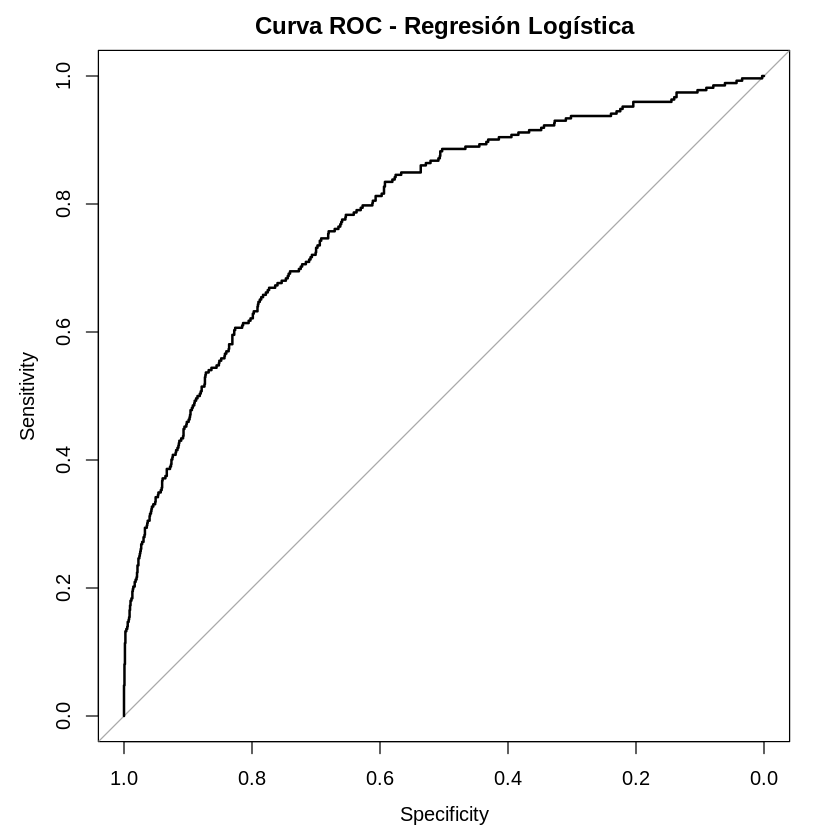

In [ ]:
# Predecir probabilidades de la clase positiva
probas_valid_log <- predict(modelo_log, newdata = valid_split, type = "prob")[, "Class_1"]

# Evaluar con ROC

roc_log <- roc(valid_split$resultado, probas_valid_log)
plot(roc_log, main = "Curva ROC - Regresión Logística")
print(paste("AUC validación:", auc(roc_log)))


MEJOR MODELO GBM "AUC validación: 0.888960435191518" con  parametros: n.trees = 500, interaction.depth =
 3, shrinkage = 0.05 and n.minobsinnode = 10

 Segundo mejor XGBoost "AUC validación: 0.88805200495896"  con parametros nrounds = 200, max_depth = 3, eta
 = 0.1, gamma = 0, colsample_bytree = 0.8, min_child_weight = 1 and subsample
 = 0.8.

MEJORES 2 MODELOS SIN OUTLIERS

In [ ]:
head(valid_split_out)

tipo_cliente,Factura_online,Antiguedad_Equipo,Plan_de_datos,facturación,mora,minutos,resultado,edad,antiguedad_contrato
<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
2,1,13,1,310672,10,1547,0,70,95
2,1,17,1,335172,0,1639,0,65,123
2,1,7,0,219843,30,899,1,72,97
3,0,19,1,251106,56,1420,0,65,82
1,1,2,1,333714,3,1558,0,65,98
2,1,10,1,207361,0,763,0,73,114


In [ ]:

# Configuración para validación cruzada
control <- trainControl(
  method = "cv",
  number = 5,
  classProbs = TRUE,
  summaryFunction = twoClassSummary,
  verboseIter = TRUE
)

# Grid de hiperparámetros
grid <- expand.grid(
  n.trees = c(100, 200, 500),
  interaction.depth = c(1, 3, 5),
  shrinkage = c(0.05, 0.1),
  n.minobsinnode = 10
)
levels(train_split_out$resultado) <- c("Class_0", "Class_1")
# Entrenamiento con caret
set.seed(123)
modelo_gbm <- train(
  resultado ~ .,
  data = train_split_out,
  method = "gbm",
  trControl = control,
  tuneGrid = grid,
  metric = "ROC",
  verbose = FALSE
)

# Ver los mejores hiperparámetros
print(modelo_gbm)

+ Fold1: shrinkage=0.05, interaction.depth=1, n.minobsinnode=10, n.trees=500 
- Fold1: shrinkage=0.05, interaction.depth=1, n.minobsinnode=10, n.trees=500 
+ Fold1: shrinkage=0.05, interaction.depth=3, n.minobsinnode=10, n.trees=500 
- Fold1: shrinkage=0.05, interaction.depth=3, n.minobsinnode=10, n.trees=500 
+ Fold1: shrinkage=0.05, interaction.depth=5, n.minobsinnode=10, n.trees=500 
- Fold1: shrinkage=0.05, interaction.depth=5, n.minobsinnode=10, n.trees=500 
+ Fold1: shrinkage=0.10, interaction.depth=1, n.minobsinnode=10, n.trees=500 
- Fold1: shrinkage=0.10, interaction.depth=1, n.minobsinnode=10, n.trees=500 
+ Fold1: shrinkage=0.10, interaction.depth=3, n.minobsinnode=10, n.trees=500 
- Fold1: shrinkage=0.10, interaction.depth=3, n.minobsinnode=10, n.trees=500 
+ Fold1: shrinkage=0.10, interaction.depth=5, n.minobsinnode=10, n.trees=500 
- Fold1: shrinkage=0.10, interaction.depth=5, n.minobsinnode=10, n.trees=500 
+ Fold2: shrinkage=0.05, interaction.depth=1, n.minobsinnode=10,

Setting levels: control = Class_0, case = Class_1

Setting direction: controls < cases



[1] "AUC validación: 0.866894948765486"


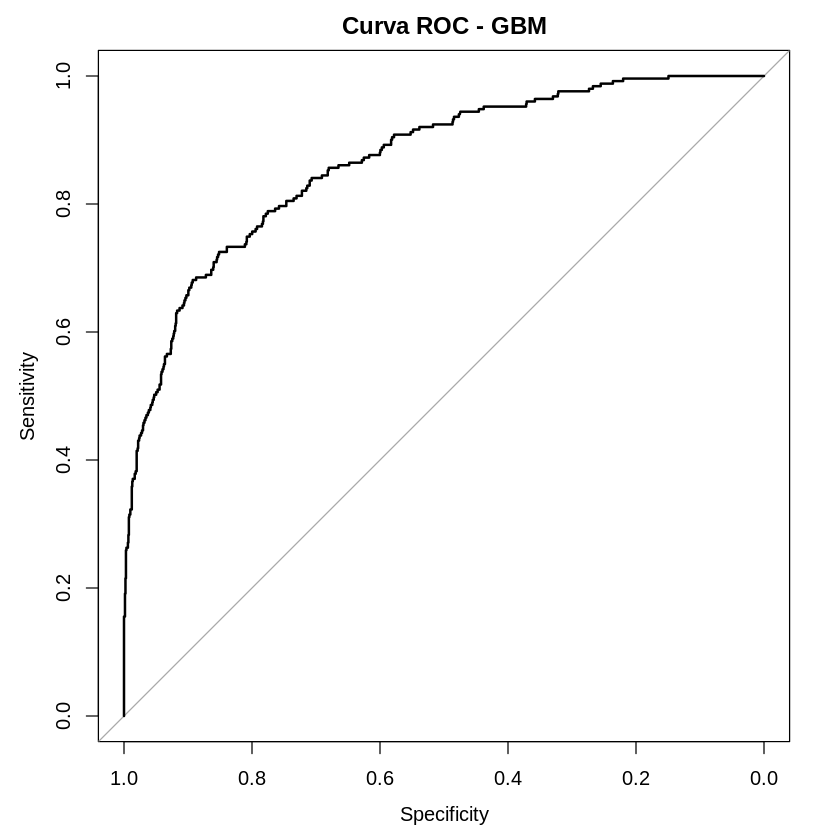

In [ ]:
# Asegúrate de tener valid_split con la columna resultado
valid_split_out$resultado <- factor(valid_split_out$resultado, levels = c(0, 1), labels = c("Class_0", "Class_1"))

# Predecir probabilidades
probas_gbm <- predict(modelo_gbm, newdata = valid_split_out, type = "prob")[, "Class_1"]

# Curva ROC
roc_gbm <- roc(valid_split_out$resultado, probas_gbm)
plot(roc_gbm, main = "Curva ROC - GBM")
print(paste("AUC validación:", auc(roc_gbm)))

Disminuyo el auc sin outliers con GBM

MODELO XGBoost sin outliers

In [ ]:
grid <- expand.grid(
  nrounds = c(100, 200),        # Número de iteraciones (árboles)
  max_depth = c(3, 6),          # Profundidad máxima del árbol
  eta = c(0.05, 0.1),           # Learning rate
  gamma = 0,                    # Penalización por dividir nodos
  colsample_bytree = 0.8,       # Fracción de columnas (features) para cada árbol
  min_child_weight = 1,         # Mínimo de observaciones en un nodo hoja
  subsample = 0.8               # Fracción de observaciones para cada árbol
)


In [ ]:
modelo_xgb <- train(
  resultado ~ .,
  data = train_split_out,
  method = "xgbTree",
  trControl = control,
  metric = "ROC",     # Evaluamos con AUC
  tuneGrid = grid
)


+ Fold1: eta=0.05, max_depth=3, gamma=0, colsample_bytree=0.8, min_child_weight=1, subsample=0.8, nrounds=200 
[23:15:53] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[23:15:53] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
- Fold1: eta=0.05, max_depth=3, gamma=0, colsample_bytree=0.8, min_child_weight=1, subsample=0.8, nrounds=200 
+ Fold1: eta=0.05, max_depth=6, gamma=0, colsample_bytree=0.8, min_child_weight=1, subsample=0.8, nrounds=200 
[23:15:54] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[23:15:54] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
- Fold1: eta=0.05, max_depth=6, gamma=0, colsample_bytree=0.8, min_child_weight=1, subsample=0.8, nrounds=200 
+ Fold1: eta=0.10, max_depth=3, gamma=0, colsample_bytree=0.8, min_child_weight=1, subsample=0.8, nrounds=200 
[23:15:55] WARNING: src/c_api

eXtreme Gradient Boosting 

6260 samples
   9 predictor
   2 classes: 'Class_0', 'Class_1' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 5007, 5008, 5008, 5008, 5009 
Resampling results across tuning parameters:

  eta   max_depth  nrounds  ROC        Sens       Spec     
  0.05  3          100      0.8593335  0.9902939  0.2484754
  0.05  3          200      0.8719107  0.9813477  0.3607901
  0.05  6          100      0.8658668  0.9779214  0.3448943
  0.05  6          200      0.8642569  0.9727820  0.3936062
  0.10  3          100      0.8714296  0.9811575  0.3627555
  0.10  3          200      0.8717527  0.9729741  0.4125018
  0.10  6          100      0.8656797  0.9716397  0.3926211
  0.10  6          200      0.8571690  0.9659307  0.4145116

Tuning parameter 'gamma' was held constant at a value of 0
Tuning

Tuning parameter 'min_child_weight' was held constant at a value of 1

Tuning parameter 'subsample' was held constant at a value of 0.8
ROC wa

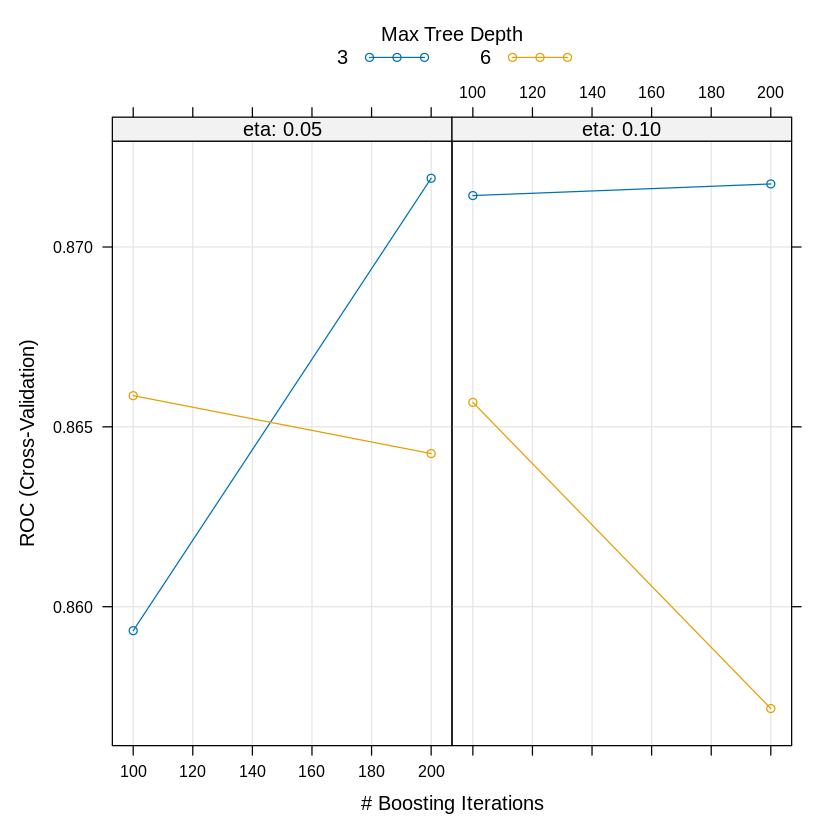

In [ ]:
print(modelo_xgb)
plot(modelo_xgb)

Setting levels: control = Class_0, case = Class_1

Setting direction: controls < cases



[1] "AUC validación: 0.868842982980492"


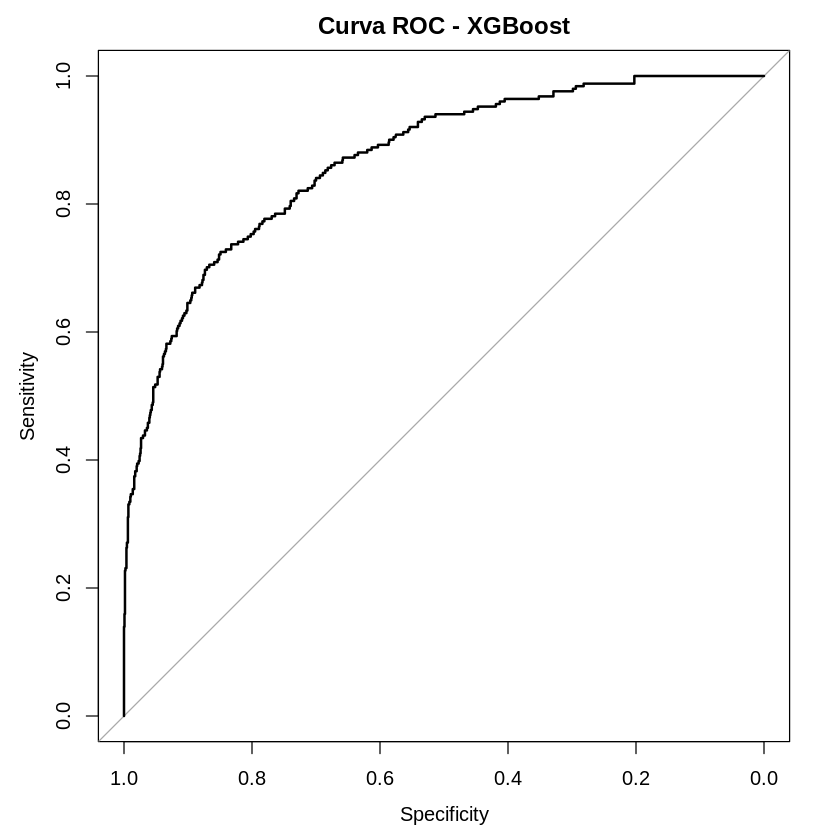

In [ ]:
# Asegúrate de que valid_split tenga el mismo preprocesamiento y niveles
probas_valid <- predict(modelo_xgb, newdata = valid_split_out, type = "prob")[, "Class_1"]

roc_xgb <- roc(valid_split_out$resultado, probas_valid)
plot(roc_xgb, main = "Curva ROC - XGBoost")
print(paste("AUC validación:", auc(roc_xgb)))


El AUC disminuye al eliminar los outliers, por lo tanto la intuición de que los outliers en este contexto eran valores importantes era correcta

Trata outliers con tecnica Snowsing

In [ ]:

# Función para winsorizar una columna numérica
winsorize <- function(x, lower_quantile = 0.01, upper_quantile = 0.99) {
  lower <- quantile(x, lower_quantile, na.rm = TRUE)
  upper <- quantile(x, upper_quantile, na.rm = TRUE)
  x <- ifelse(x < lower, lower, x)
  x <- ifelse(x > upper, upper, x)
  return(x)
}

# Copia del dataset original
df_train_winso <- df_train

# Excluir 'resultado' de las columnas a winsorizar
numeric_cols <- setdiff(
  names(df_train_winso)[sapply(df_train_winso, is.numeric)],
  "resultado"
)

# Aplicar winsorizing solo a columnas numéricas distintas a 'resultado'
df_train_winso <- df_train_winso %>%
  mutate(across(all_of(numeric_cols), ~ winsorize(.)))

# Reestablecer la variable 'resultado' como factor binario
df_train_winso$resultado <- factor(df_train$resultado, levels = c(0, 1))



In [ ]:

set.seed(123)

# Divide datos de entrenamiento en train/validación
index <- createDataPartition(df_train_winso$resultado, p = 0.8, list = FALSE)
train_split_winso <- df_train_winso[index, ]
valid_split_winso <- df_train_winso[-index, ]


In [ ]:
# Ensure the outcome variable levels are valid R names for caret
levels(train_split_winso$resultado) <- c("Class_0", "Class_1")
levels(valid_split_winso$resultado) <- c("Class_0", "Class_1")

In [ ]:
# Configuración para validación cruzada
control <- trainControl(
  method = "cv",
  number = 5,
  classProbs = TRUE,
  summaryFunction = twoClassSummary,
  verboseIter = TRUE
)

# Grid de hiperparámetros
grid <- expand.grid(
  n.trees = c(100, 200, 500),
  interaction.depth = c(1, 3, 5),
  shrinkage = c(0.05, 0.1),
  n.minobsinnode = 10
)

# Entrenamiento con caret
set.seed(123)
modelo_gbm <- train(
  resultado ~ .,
  data = train_split_winso,
  method = "gbm",
  trControl = control,
  tuneGrid = grid,
  metric = "ROC",
  verbose = FALSE
)

# Ver los mejores hiperparámetros
print(modelo_gbm)

+ Fold1: shrinkage=0.05, interaction.depth=1, n.minobsinnode=10, n.trees=500 
- Fold1: shrinkage=0.05, interaction.depth=1, n.minobsinnode=10, n.trees=500 
+ Fold1: shrinkage=0.05, interaction.depth=3, n.minobsinnode=10, n.trees=500 
- Fold1: shrinkage=0.05, interaction.depth=3, n.minobsinnode=10, n.trees=500 
+ Fold1: shrinkage=0.05, interaction.depth=5, n.minobsinnode=10, n.trees=500 
- Fold1: shrinkage=0.05, interaction.depth=5, n.minobsinnode=10, n.trees=500 
+ Fold1: shrinkage=0.10, interaction.depth=1, n.minobsinnode=10, n.trees=500 
- Fold1: shrinkage=0.10, interaction.depth=1, n.minobsinnode=10, n.trees=500 
+ Fold1: shrinkage=0.10, interaction.depth=3, n.minobsinnode=10, n.trees=500 
- Fold1: shrinkage=0.10, interaction.depth=3, n.minobsinnode=10, n.trees=500 
+ Fold1: shrinkage=0.10, interaction.depth=5, n.minobsinnode=10, n.trees=500 
- Fold1: shrinkage=0.10, interaction.depth=5, n.minobsinnode=10, n.trees=500 
+ Fold2: shrinkage=0.05, interaction.depth=1, n.minobsinnode=10,

Setting levels: control = Class_0, case = Class_1

Setting direction: controls < cases



[1] "AUC validación: 0.883996131155951"


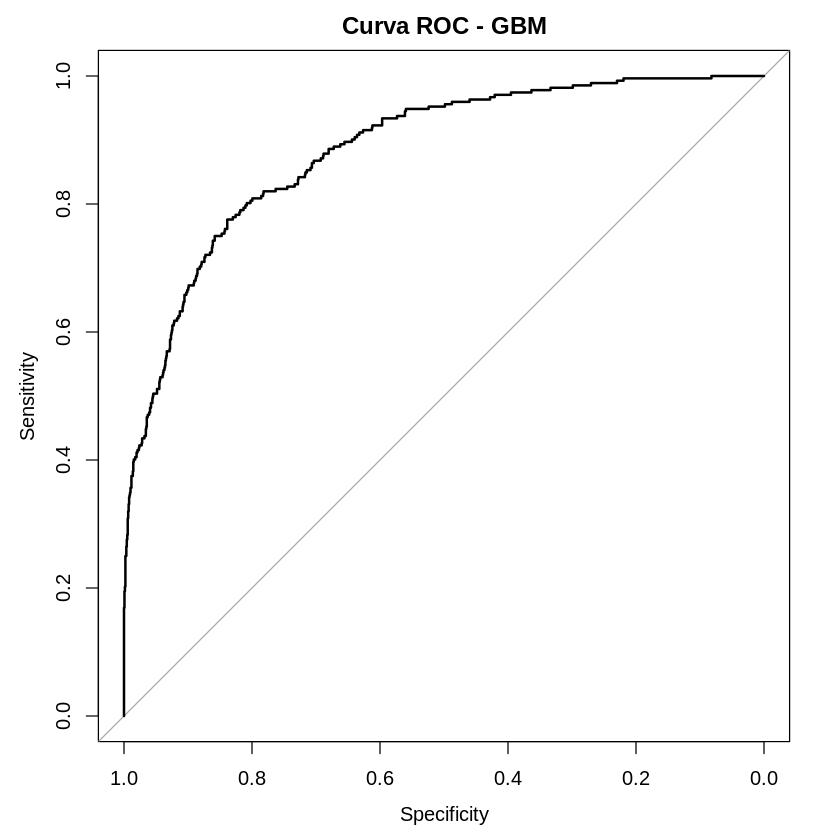

In [ ]:
probas_gbm <- predict(modelo_gbm, newdata = valid_split_winso, type = "prob")[, "Class_1"]

# Paso 6: AUC y curva ROC
roc_gbm <- roc(valid_split_winso$resultado, probas_gbm)
plot(roc_gbm, main = "Curva ROC - GBM")
print(paste("AUC validación:", auc(roc_gbm)))


SMOTE

Se intento hacer balanceo de clases, pero esto tan solo en balancearlas toma mas de 40 minutos, y la ram despues colapsa al entrenar los modelo, por lo tanto no se pudieron obtener estas metricas, se deja las instruciones del intento.

In [ ]:
install.packages("smotefamily")
library(smotefamily)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘FNN’, ‘dbscan’, ‘igraph’




In [ ]:
df_train_smote <- df_train

ERROR: Error: object 'df_train' not found


In [ ]:
sapply(df_train_smote, class)


tipo_cliente      Factura_online   Antiguedad_Equipo       Plan_de_datos 
           "factor"            "factor"           "numeric"            "factor" 
        facturación                mora             minutos           resultado 
          "numeric"           "numeric"           "numeric"            "factor" 
               edad antiguedad_contrato 
          "numeric"           "numeric"

In [ ]:
install.packages("fastDummies")
library(fastDummies)



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:

df_smote_ready <- dummy_cols(df_train_smote)

In [ ]:
unique(df_train_smote$resultado)
table(df_train_smote$resultado, useNA = "always")


[1] 0 1
Levels: 0 1


   0    1 <NA> 
6882 1361    0 

#Se demora 40 min casi

In [ ]:

# 1. Crear variables dummy para todas las columnas factor, excepto la variable objetivo 'resultado'
cols_to_dummy <- setdiff(names(df_train_smote), "resultado")

df_smote_ready <- dummy_cols(df_train_smote,
                             select_columns = cols_to_dummy,
                             remove_selected_columns = TRUE)

# 2. Convertir variable objetivo 'resultado' a numérica 0 y 1 para SMOTEfamily
df_smote_ready$resultado_num <- as.numeric(df_smote_ready$resultado) - 1  # "0" y "1" como números

# 3. Separar variables predictoras y variable objetivo para SMOTEfamily
X_for_smote <- df_smote_ready[, setdiff(names(df_smote_ready), c("resultado", "resultado_num"))]
target_for_smote <- df_smote_ready$resultado_num

# 4. Aplicar SMOTE con SMOTEfamily
smote_out <- SMOTE(X = X_for_smote,
                   target = target_for_smote,
                   K = 5,
                   dup_size = 0)  # dup_size ajusta cuántas muestras se sintetizan (0 es default)

# 5. Reconstruir dataframe balanceado
df_smote <- smote_out$data

# 6. Ajustar variable objetivo: SMOTEfamily devuelve la variable objetivo en la columna 'class'
df_smote$resultado <- factor(df_smote$class, levels = c(0, 1), labels = c("0", "1"))
df_smote$class <- NULL  # eliminar columna extra

# Ya tienes el dataframe df_smote balanceado listo para modelar.
# Puedes verificar distribución:
table(df_smote$resultado)


   0    1 
6882 6805 

In [ ]:
head(df_smote)

tipo_cliente_1,tipo_cliente_2,tipo_cliente_3,Factura_online_0,Factura_online_1,Antiguedad_Equipo_1,Antiguedad_Equipo_2,Antiguedad_Equipo_3,Antiguedad_Equipo_4,Antiguedad_Equipo_5,⋯,antiguedad_contrato_151,antiguedad_contrato_153,antiguedad_contrato_155,antiguedad_contrato_156,antiguedad_contrato_158,antiguedad_contrato_159,antiguedad_contrato_161,antiguedad_contrato_162,antiguedad_contrato_163,resultado
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0,1,0,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,1
0,1,0,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,1
0,1,0,0,1,0,0,0,1,0,⋯,0,0,0,0,0,0,0,0,0,1
0,0,1,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,1
0,1,0,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,1


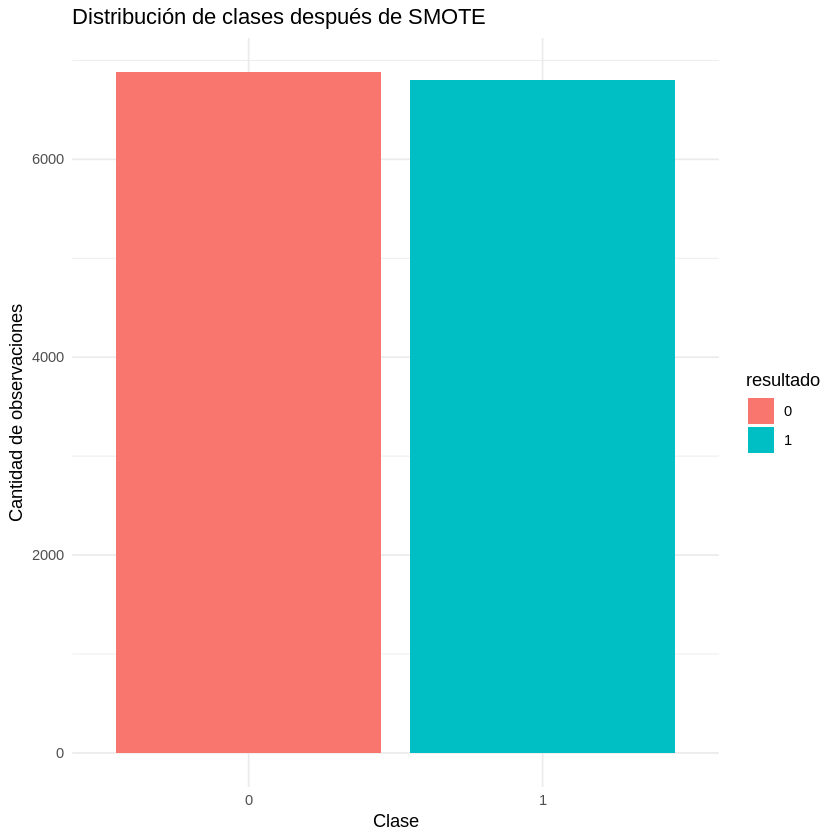

In [ ]:
ggplot(df_smote, aes(x = resultado, fill = resultado)) +
  geom_bar() +
  labs(title = "Distribución de clases después de SMOTE",
       x = "Clase",
       y = "Cantidad de observaciones") +
  theme_minimal()


In [ ]:
set.seed(123)
index <- createDataPartition(df_smote$resultado, p = 0.8, list = FALSE)
train_split_smote <- df_smote[index, ]
valid_split_smote <- df_smote[-index, ]

ERROR: Error in createDataPartition(df_smote$resultado, p = 0.8, list = FALSE): could not find function "createDataPartition"


In [ ]:
# Asegúrate de tener valid_split con la columna resultado
valid_split_out$resultado <- factor(valid_split_out$resultado, levels = c(0, 1), labels = c("Class_0", "Class_1"))

# Predecir probabilidades
probas_gbm <- predict(modelo_gbm, newdata = valid_split_out, type = "prob")[, "Class_1"]

# Curva ROC
roc_gbm <- roc(valid_split_out$resultado, probas_gbm)
plot(roc_gbm, main = "Curva ROC - GBM")
print(paste("AUC validación:", auc(roc_gbm)))

In [ ]:
# Configuración para validación cruzada
control <- trainControl(
  method = "cv",
  number = 5,
  classProbs = TRUE,
  summaryFunction = twoClassSummary,
  verboseIter = TRUE
)

# Grid de hiperparámetros
grid <- expand.grid(
  n.trees = c(100, 200, 500),
  interaction.depth = c(1, 3, 5),
  shrinkage = c(0.05, 0.1),
  n.minobsinnode = 10
)
levels(train_split_smote$resultado) <- c("Class_0", "Class_1")
# Entrenamiento con caret


+ Fold1: shrinkage=0.05, interaction.depth=1, n.minobsinnode=10, n.trees=500 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 57: `facturación_-678` has no variation.”
Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: `facturación_-9039` has no variation.”
Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 65: `facturación_-15009` has no variation.”
Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 66: `facturación_-16003` has no variation.”
Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 70: `facturación_-27337` has no variation.”
Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 71: `facturación_-36200` has no variation.”
Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 72: `factur

In [ ]:

nzv <- nearZeroVar(train_split_smote, saveMetrics = TRUE)
variables_validas <- rownames(nzv[nzv$zeroVar == FALSE, ])
train_split_smote_clean <- train_split_smote[, c(variables_validas, "resultado")]

ERROR: Error in nearZeroVar(train_split_smote, saveMetrics = TRUE): could not find function "nearZeroVar"


In [ ]:
set.seed(123)
modelo_gbm <- train(
  resultado ~ .,
  data = train_split_smote,
  method = "gbm",
  trControl = control,
  tuneGrid = grid,
  metric = "ROC",
  verbose = FALSE
)

# Ver los mejores hiperparámetros
print(modelo_gbm)

# PREDICCIONES

PREDIONES AL CONJUNTO DE DATOS DF_TEST CON EL MEJOR MODELO GBM CON UN MEJOR MODELO GBM "AUC validación: 0.888960435191518" con  parametros: n.trees = 500, interaction.depth =
 3, shrinkage = 0.05 and n.minobsinnode = 10

In [ ]:
# Predecir quitando la columna id del test
probas_test <- predict(modelo_gbm, newdata = df_test[, setdiff(names(df_test), "id")], type = "prob")[, "Class_1"]


In [ ]:
head(probas_test)

[1] 0.085219639 0.096225306 0.009690282 0.054072315 0.058279283 0.230175289

In [ ]:
df_submission <- data.frame(id = df_test$id, resultado = probas_test)
write.csv(df_submission, file = "submission.csv", row.names = FALSE)
